In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/fraud_data/fraudTrain.csv')

In [ ]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
for col in data.columns:
  print(col, data[col].nunique())

Unnamed: 0 1296675
trans_date_trans_time 1274791
cc_num 983
merchant 693
category 14
amt 52928
first 352
last 481
gender 2
street 983
city 894
state 51
zip 970
lat 968
long 969
city_pop 879
job 494
dob 968
trans_num 1296675
unix_time 1274823
merch_lat 1247805
merch_long 1275745
is_fraud 2


In [ ]:
def calculate_age(birthdate,transaction_date):
    age = transaction_date.year - birthdate.year - ((transaction_date.month, transaction_date.day) < (birthdate.month, birthdate.day))
    return age

In [ ]:
def classify_age(age):
    if age < 21:
        return 'young'
    elif age < 35:
        return 'middle'
    elif age < 55:
        return 'old'
    else:
        return 'oldest'

In [ ]:
import math

def calculate_distance(merchant_lat,merchant_long,holder_lat,holder_long):
    lat1, lon1, lat2, lon2 = map(math.radians, [merchant_lat, merchant_long, holder_lat, holder_long])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371
    return c * r

In [ ]:
def classify_distance(distance):
    if distance < 50:
        return 'high'
    elif distance < 110:
        return 'medium'
    else:
        return 'long'

In [ ]:
def classify_hour(hour):
    if hour in [22, 23, 0, 1, 2, 3]:
        return 'high'
    elif hour in [14, 18, 19, 13, 15, 17, 16, 21, 12, 20]:
        return 'medium'
    else:
        return 'low'

In [ ]:
def parse_feature(data_to_parse):
  data_to_parse['trans_date_trans_time'] = pd.to_datetime(data_to_parse['trans_date_trans_time'])
  data_to_parse['dob'] = pd.to_datetime(data_to_parse['dob'])
  data_to_parse['time'] = data_to_parse['trans_date_trans_time'].dt.time
  data_to_parse['date'] = data_to_parse['trans_date_trans_time'].dt.date
  data_to_parse['year'] = data_to_parse['trans_date_trans_time'].dt.year
  data_to_parse['month'] = data_to_parse['trans_date_trans_time'].dt.month
  data_to_parse['day'] = data_to_parse['trans_date_trans_time'].dt.day
  data_to_parse['dayofweek'] = data_to_parse['trans_date_trans_time'].dt.dayofweek
  data_to_parse['hour'] = data_to_parse['trans_date_trans_time'].dt.hour
  data_to_parse['minute'] = data_to_parse['trans_date_trans_time'].dt.minute
  data_to_parse['second'] = data_to_parse['trans_date_trans_time'].dt.second

  data_to_parse['age'] = data_to_parse.apply(lambda row: calculate_age(row['dob'], row['trans_date_trans_time']), axis=1)
  data_to_parse['age_class'] = data_to_parse.apply(lambda row: classify_age(row['age']), axis=1)

  data_to_parse['distance'] = data_to_parse.apply(lambda row: calculate_distance(row['merch_lat'],row['merch_long'],row['lat'],row['long']), axis=1)
  data_to_parse['distance_risk_class'] = data_to_parse.apply(lambda row: classify_distance(row['distance']), axis=1)

  data_to_parse['hour_risk_class'] = data_to_parse['hour'].apply(classify_hour)

  data_to_parse['cc_order_index'] = data_to_parse.groupby(['cc_num', 'day']).cumcount() + 1
  data_to_parse['merchant'] = data_to_parse['merchant'].str.replace('fraud_', '', regex=False)
  data_to_parse['category_fraud_rate'] = data_to_parse.groupby('category')['is_fraud'].transform('mean')
  data_to_parse['merchant_fraud_rate'] = data_to_parse.groupby('merchant')['is_fraud'].transform('mean')
  data_to_parse['cc_fraud_rate'] = data_to_parse.groupby('cc_num')['is_fraud'].transform('mean')
  data_to_parse['job_fraud_rate'] = data_to_parse.groupby('job')['is_fraud'].transform('mean')
  data_to_parse = pd.get_dummies(data_to_parse, columns=['hour_risk_class','distance_risk_class','age_class'],dtype=int)
  return data_to_parse

parsed_data = parse_feature(data)

In [ ]:
parsed_data = parsed_data.drop(columns=[
    'Unnamed: 0',
    'first',
    'last',
    'gender',
    'street',
    'zip',
    'state',
    'city_pop',
    'trans_num',
    'unix_time',
    'trans_date_trans_time',
    'city',
    'date',
    'year',
    'month',
    'day',
    'dob',
    'time',
    'second',
    'minute',
    'lat',
    'long',
    'merch_lat',
    'merch_long',
    'merchant',
    'category',
    'job',
    'cc_num',
])

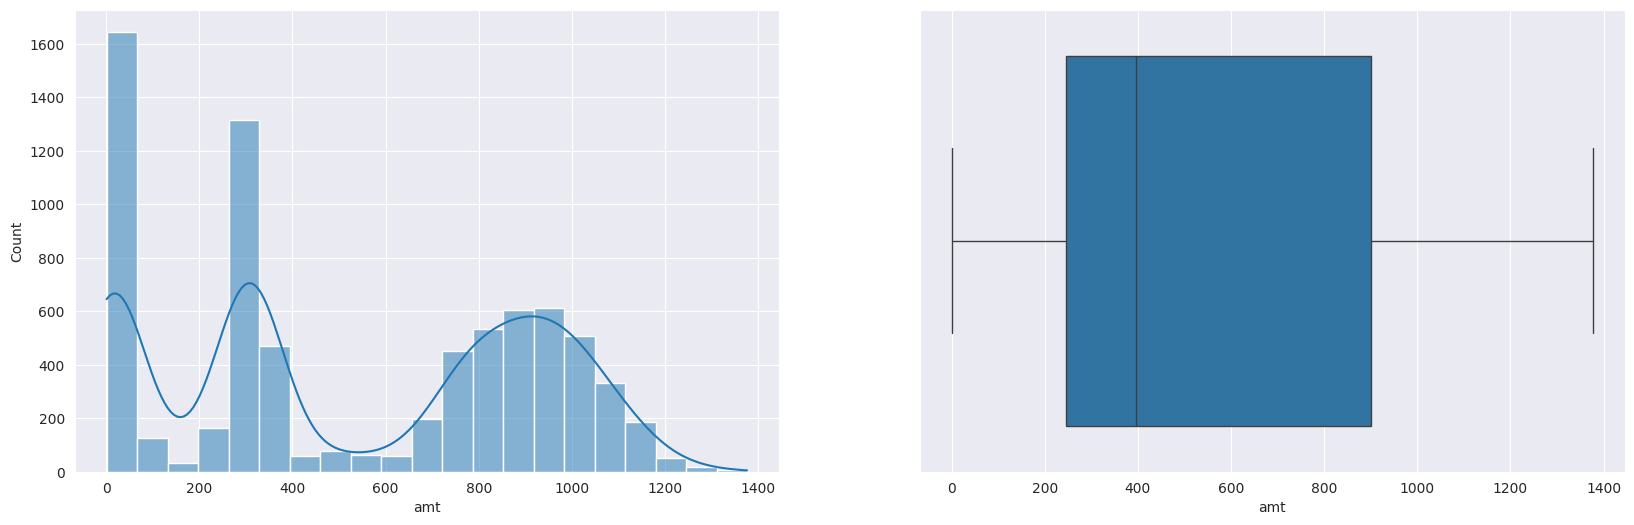

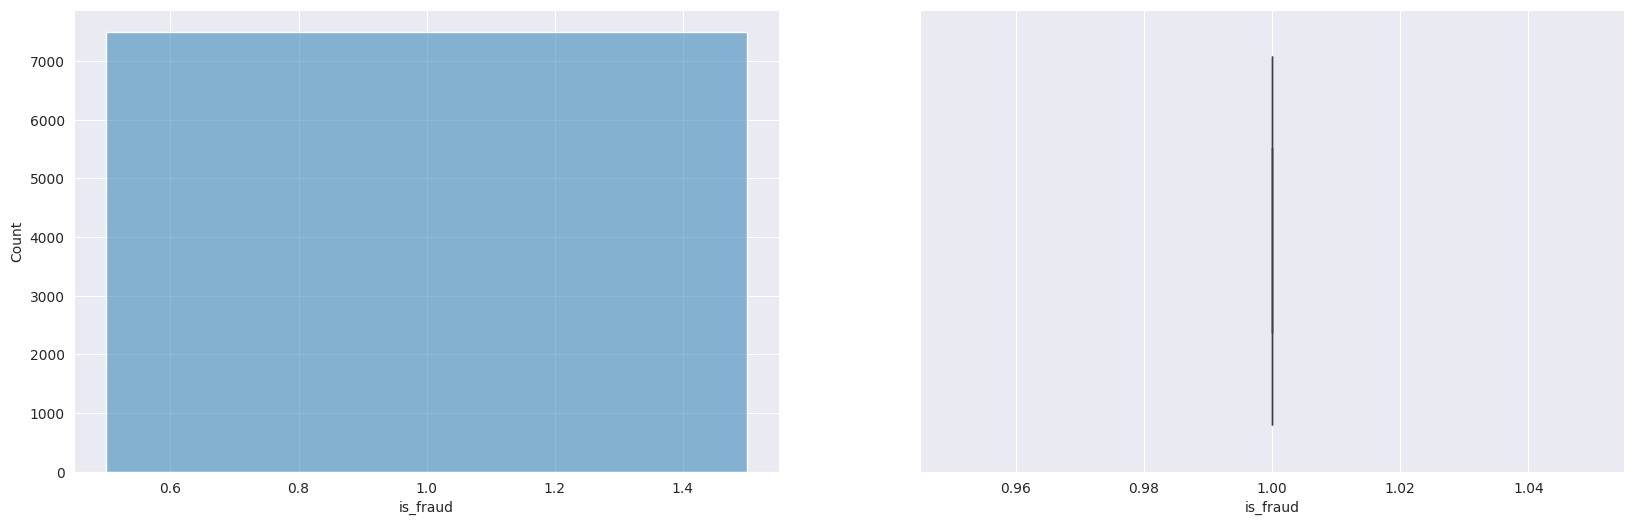

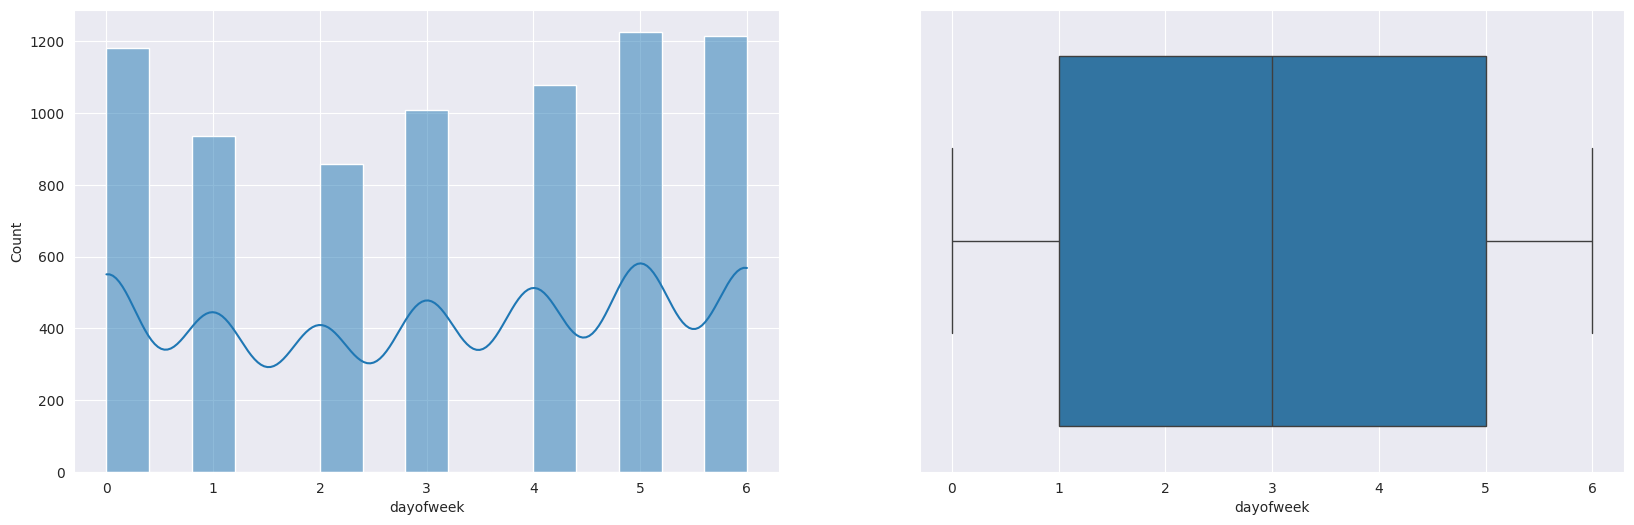

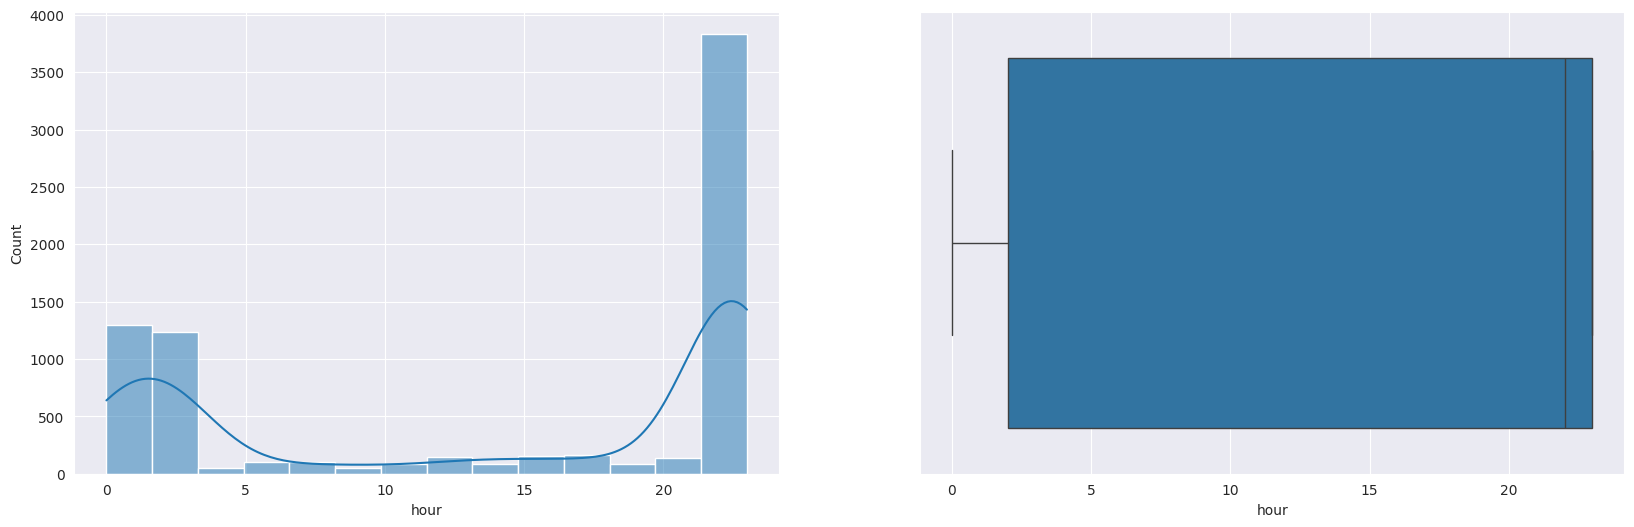

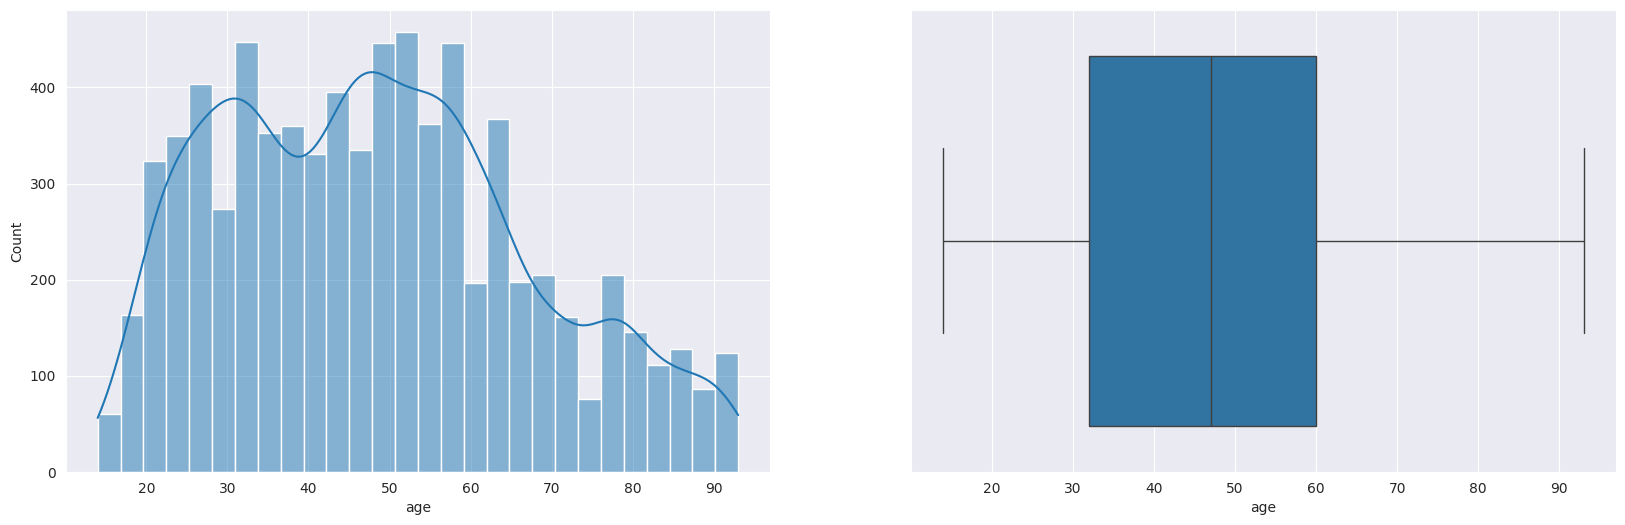

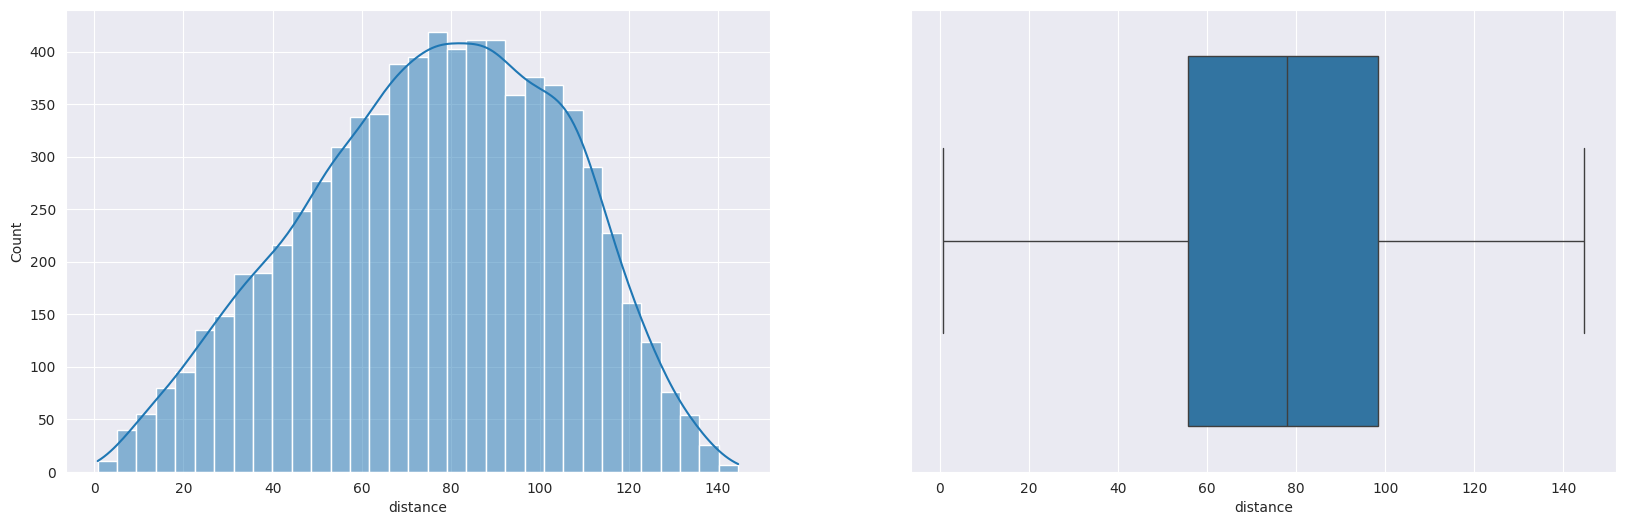

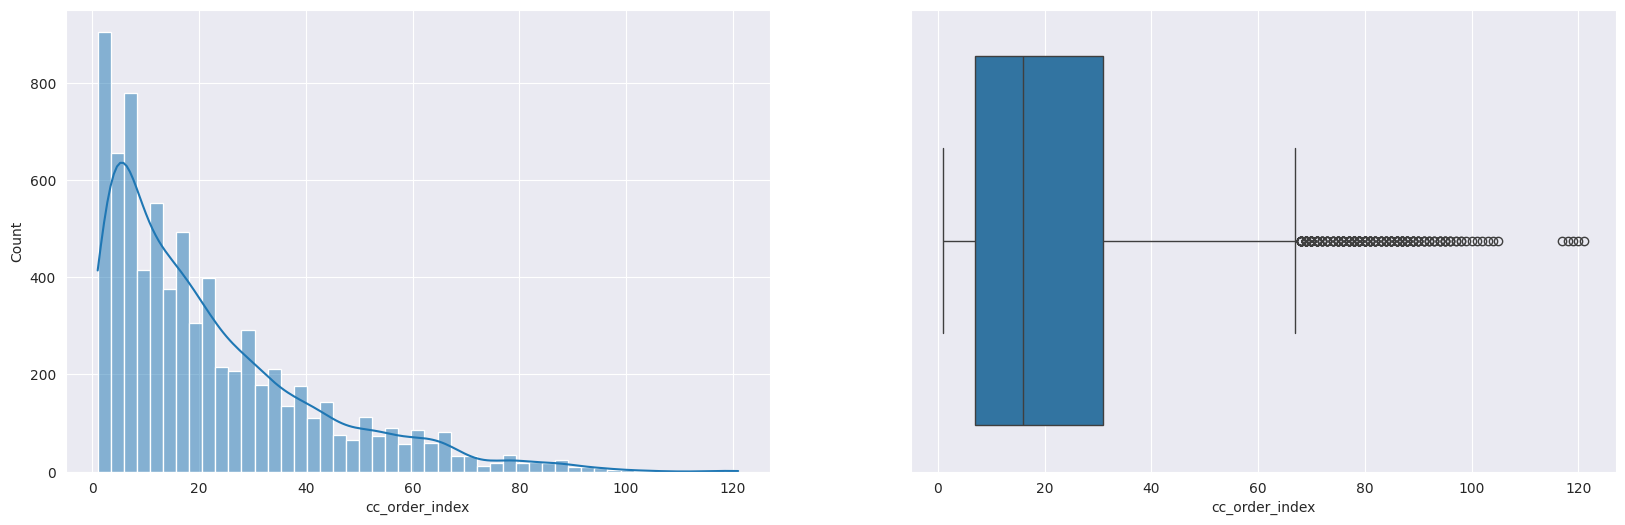

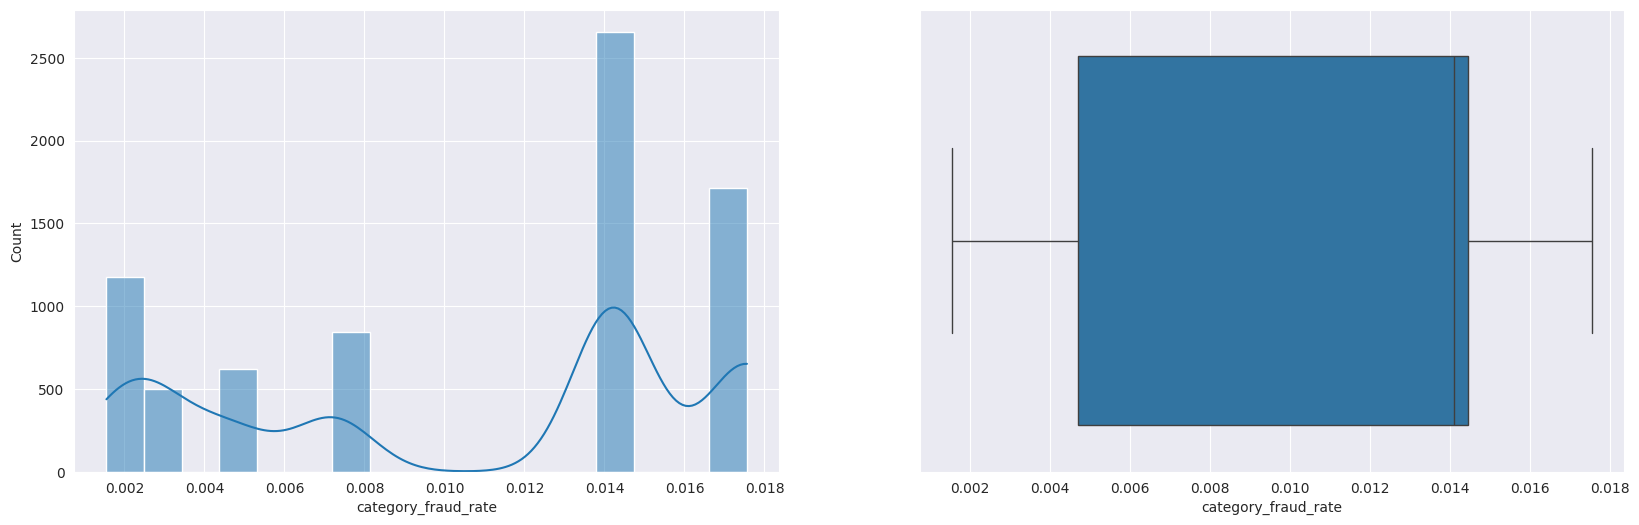

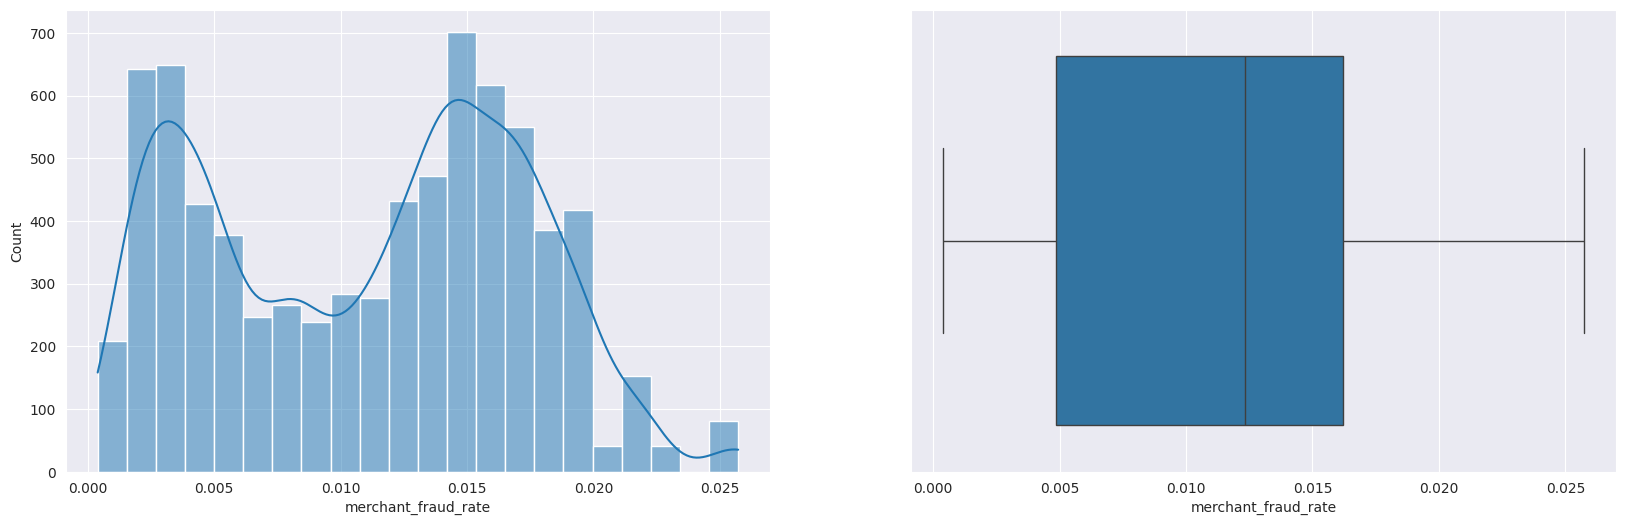

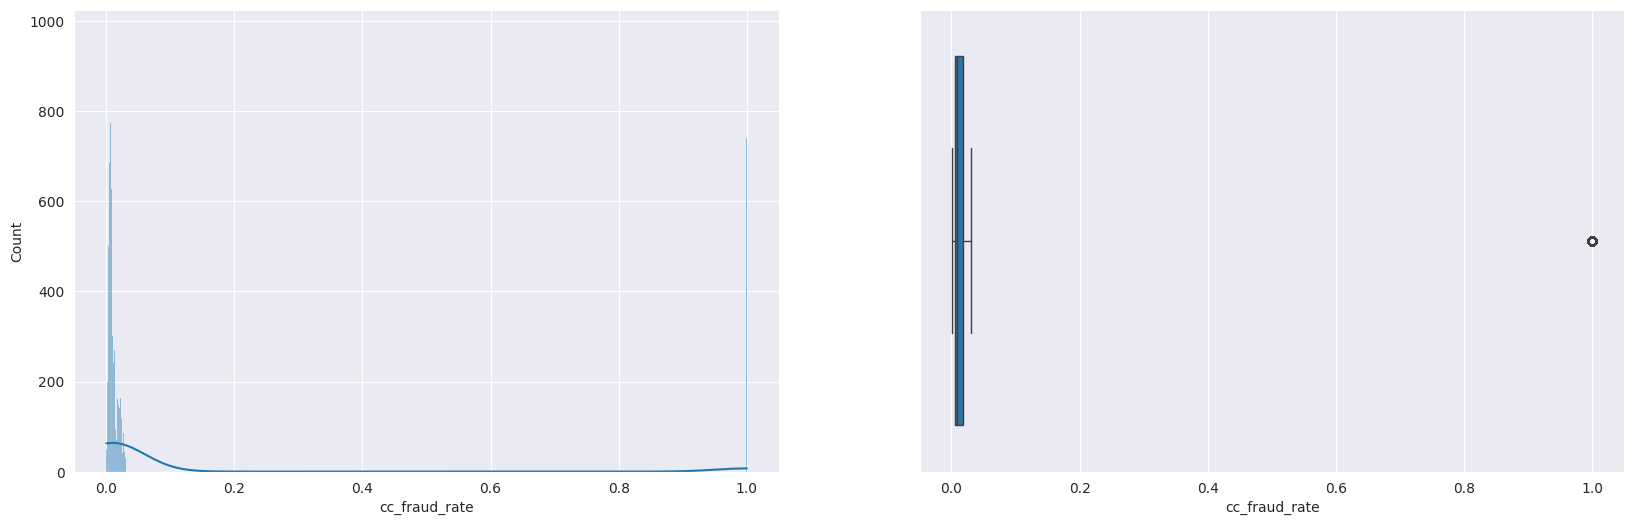

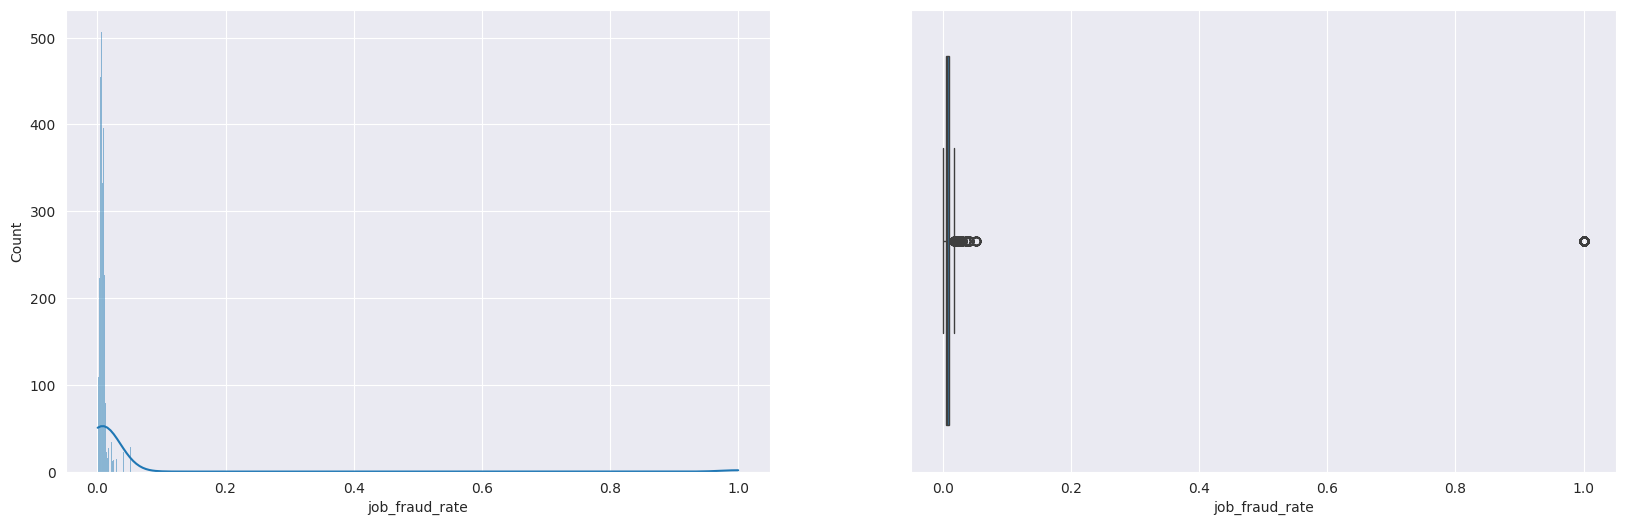

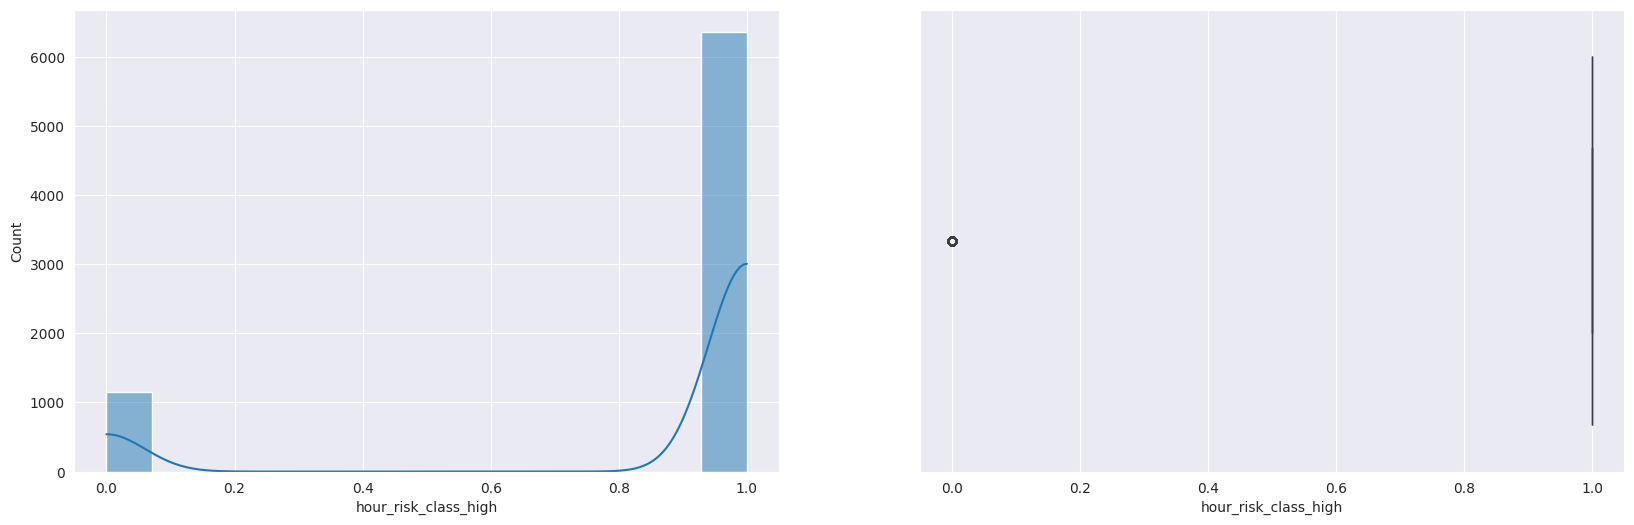

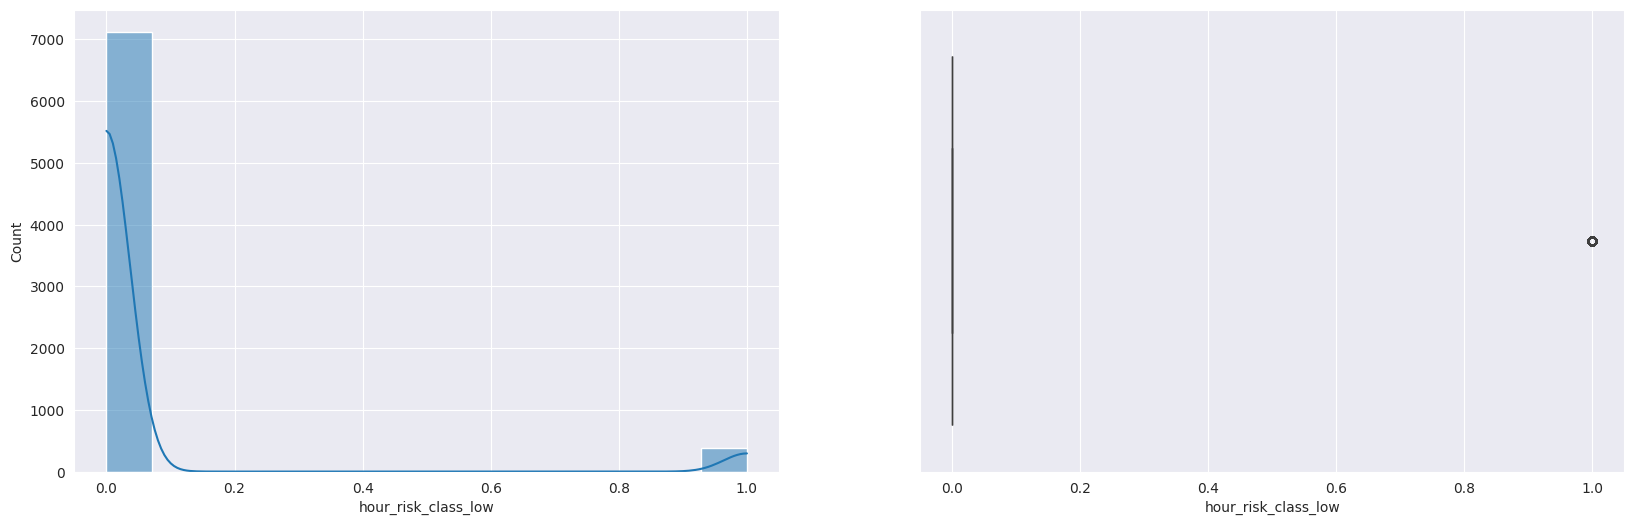

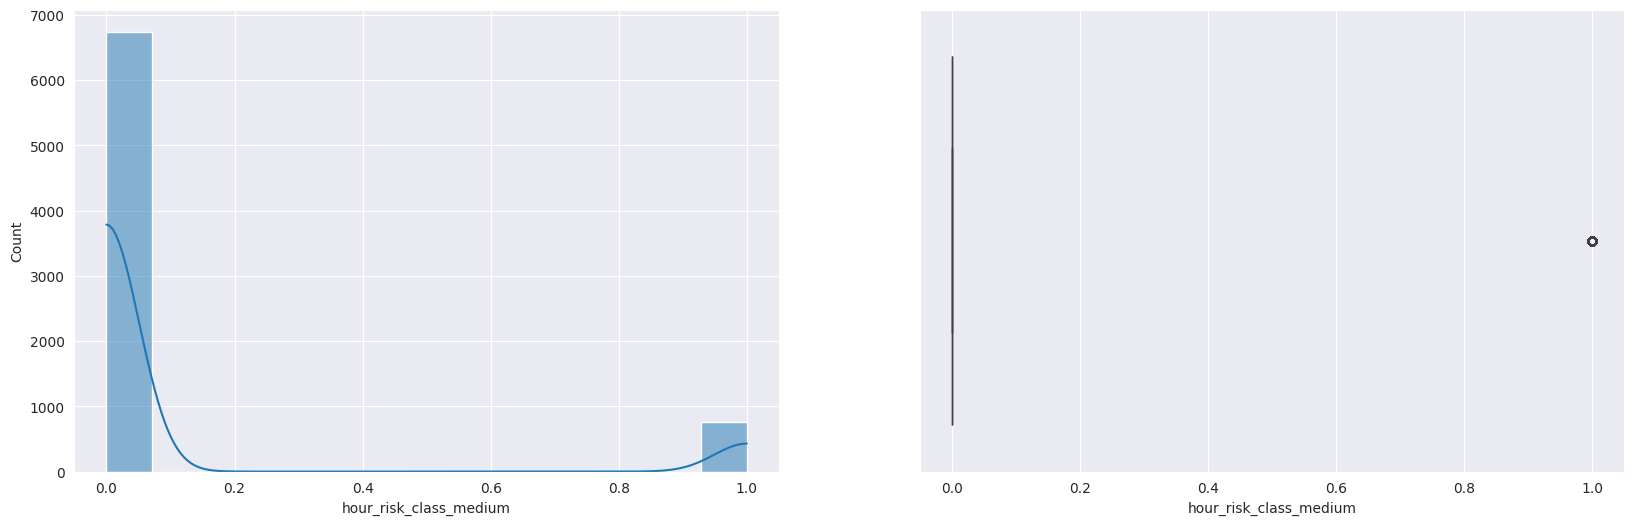

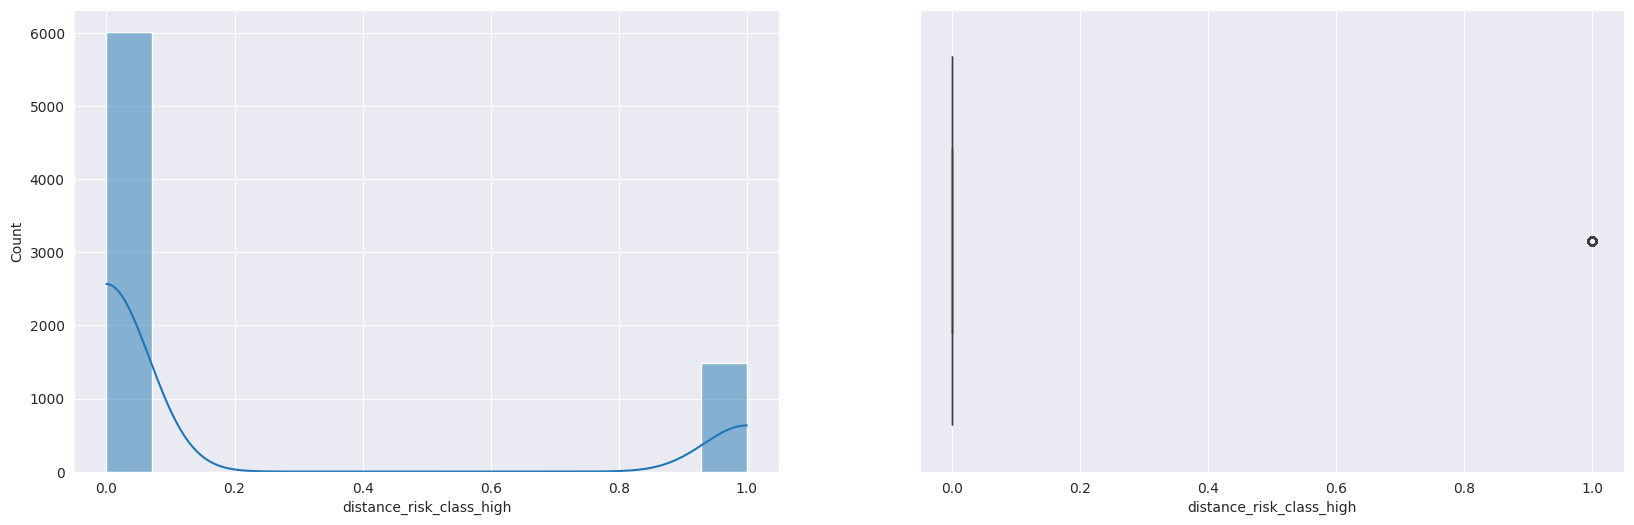

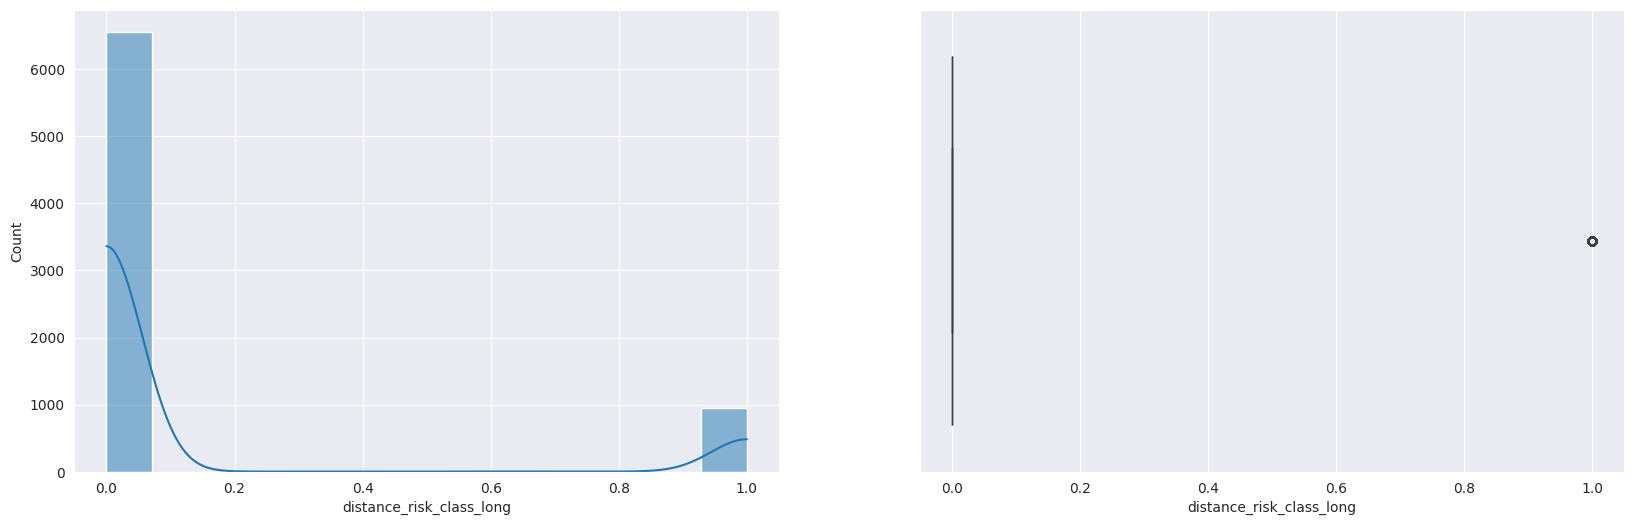

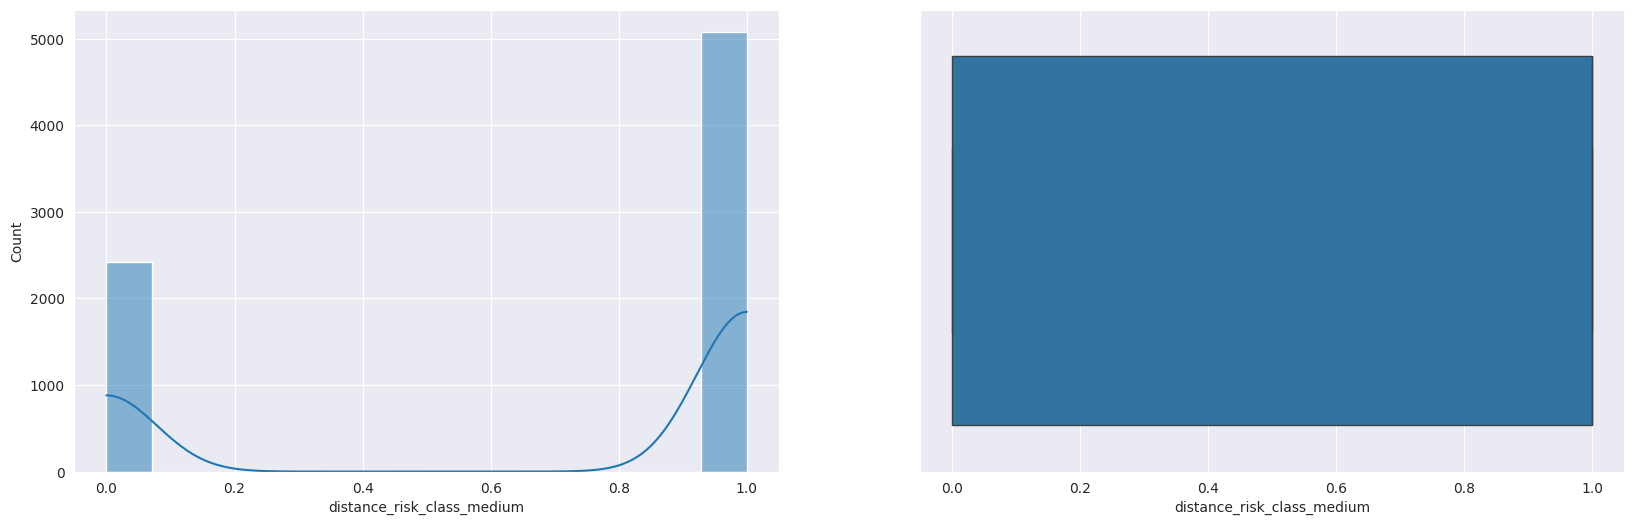

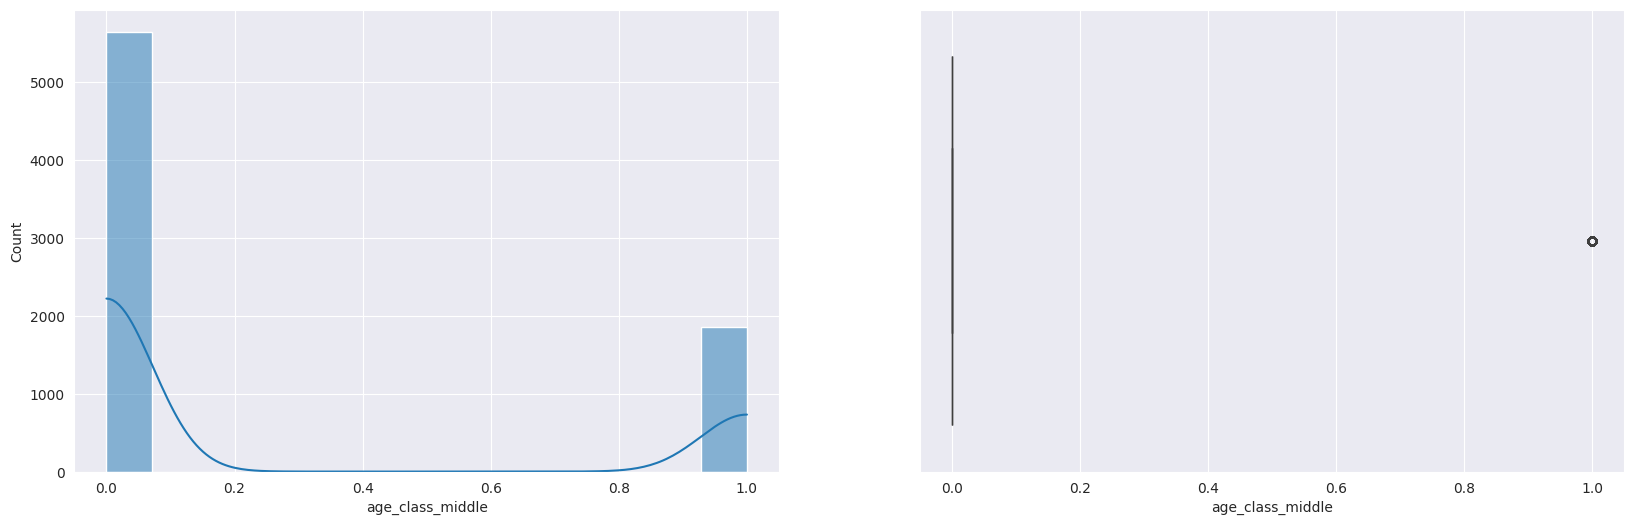

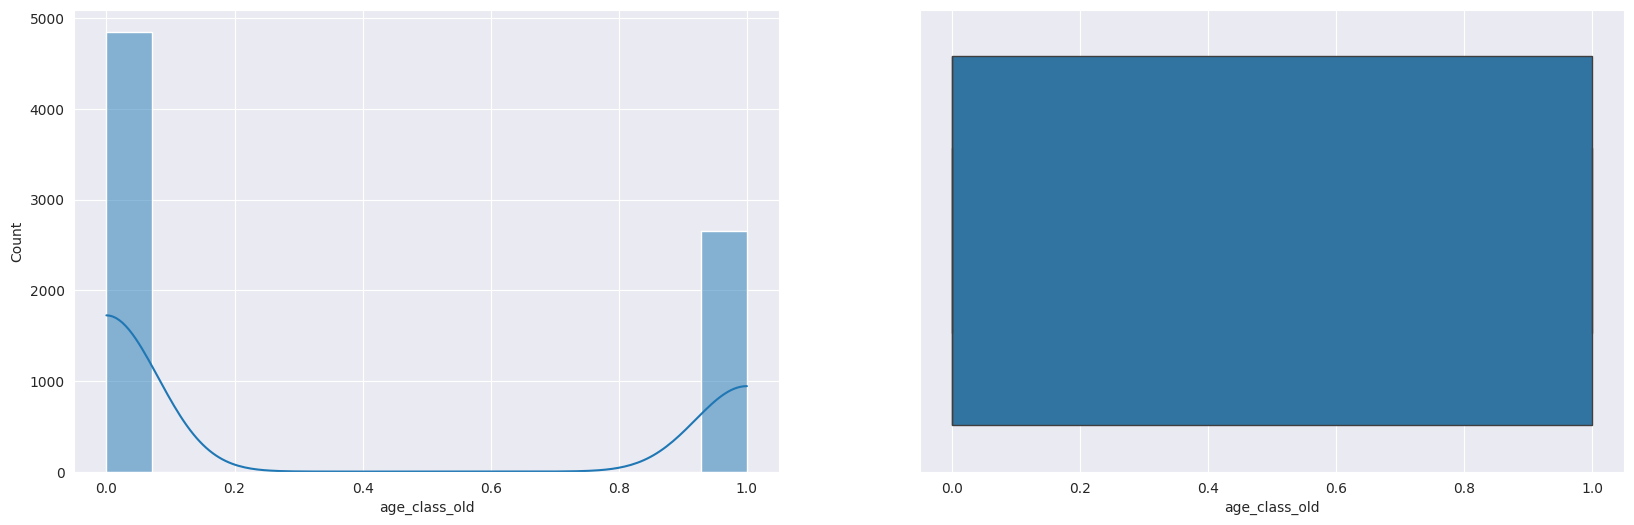

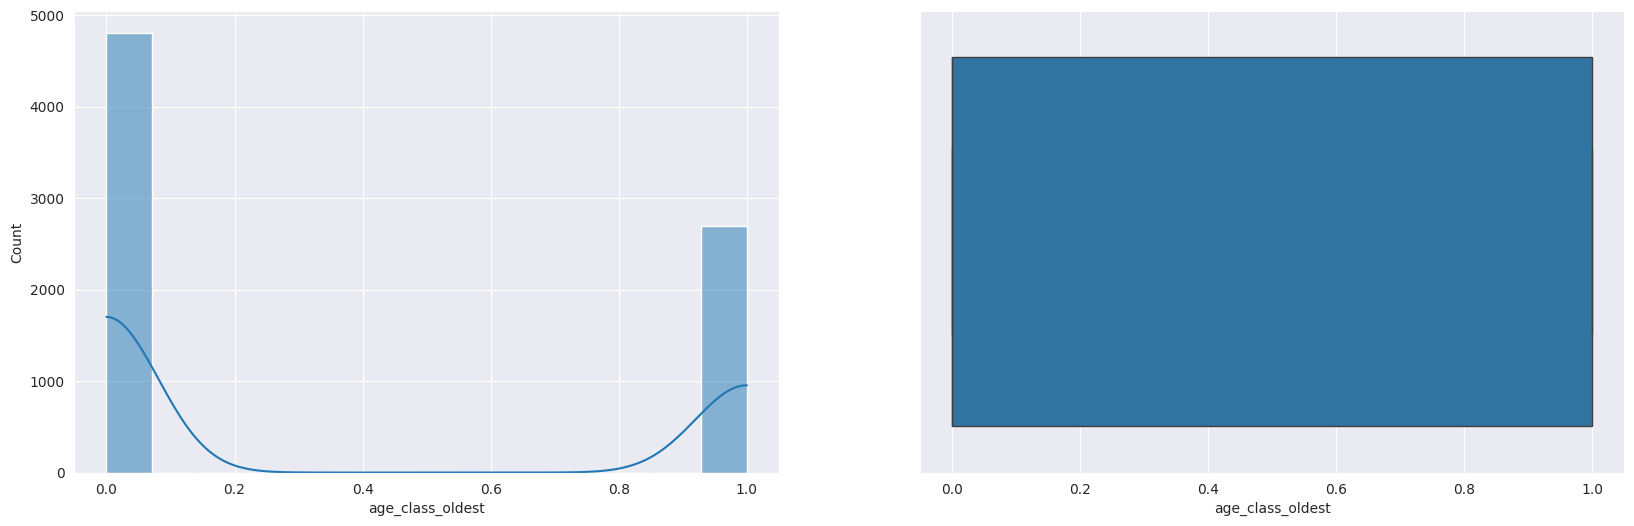

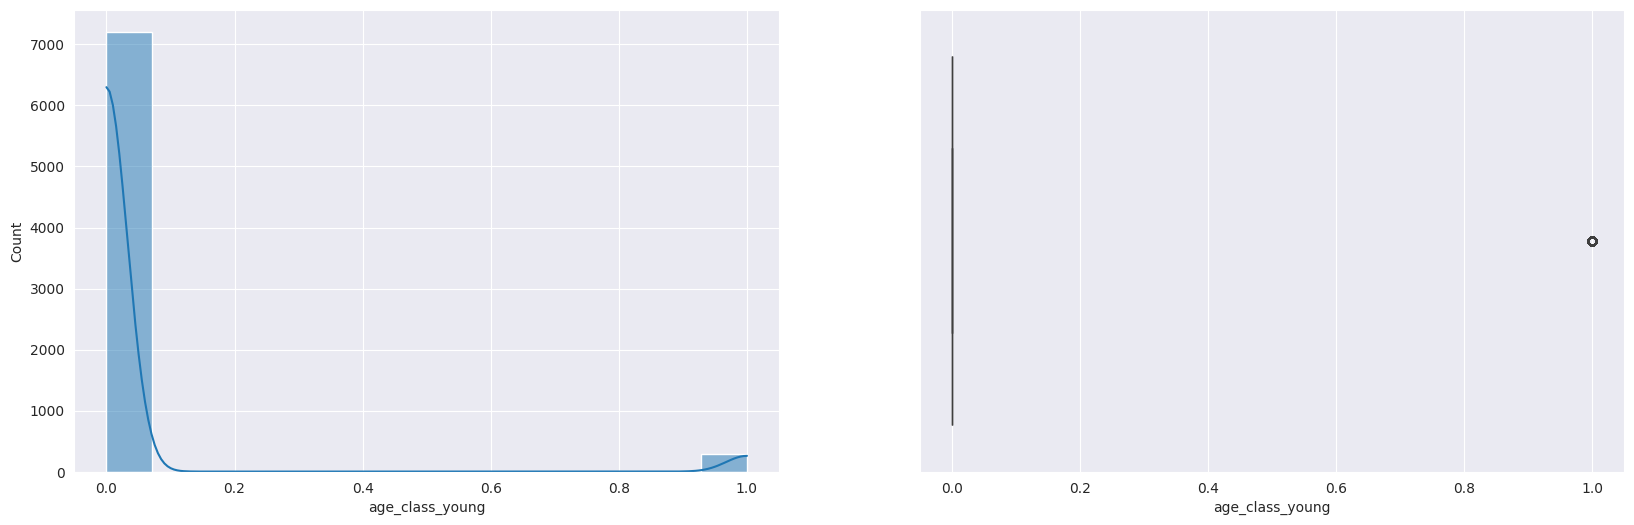

In [ ]:
fraud_data = parsed_data[parsed_data['is_fraud'] == 1]

for col in fraud_data.columns:
  if fraud_data[col].dtype != 'object':
    with sns.axes_style('darkgrid'):
      fig, ax = plt.subplots(1, 2, figsize=(20, 6))
      sns.histplot(data=fraud_data, x=col, kde=True, ax=ax[0])
      sns.boxplot(data=fraud_data, x=col, ax=ax[1])
    plt.show()

In [ ]:
parsed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   amt                         1296675 non-null  float64
 1   is_fraud                    1296675 non-null  int64  
 2   dayofweek                   1296675 non-null  int32  
 3   hour                        1296675 non-null  int32  
 4   age                         1296675 non-null  int64  
 5   distance                    1296675 non-null  float64
 6   cc_order_index              1296675 non-null  int64  
 7   category_fraud_rate         1296675 non-null  float64
 8   merchant_fraud_rate         1296675 non-null  float64
 9   cc_fraud_rate               1296675 non-null  float64
 10  job_fraud_rate              1296675 non-null  float64
 11  hour_risk_class_high        1296675 non-null  int64  
 12  hour_risk_class_low         1296675 non-null  int64  
 1

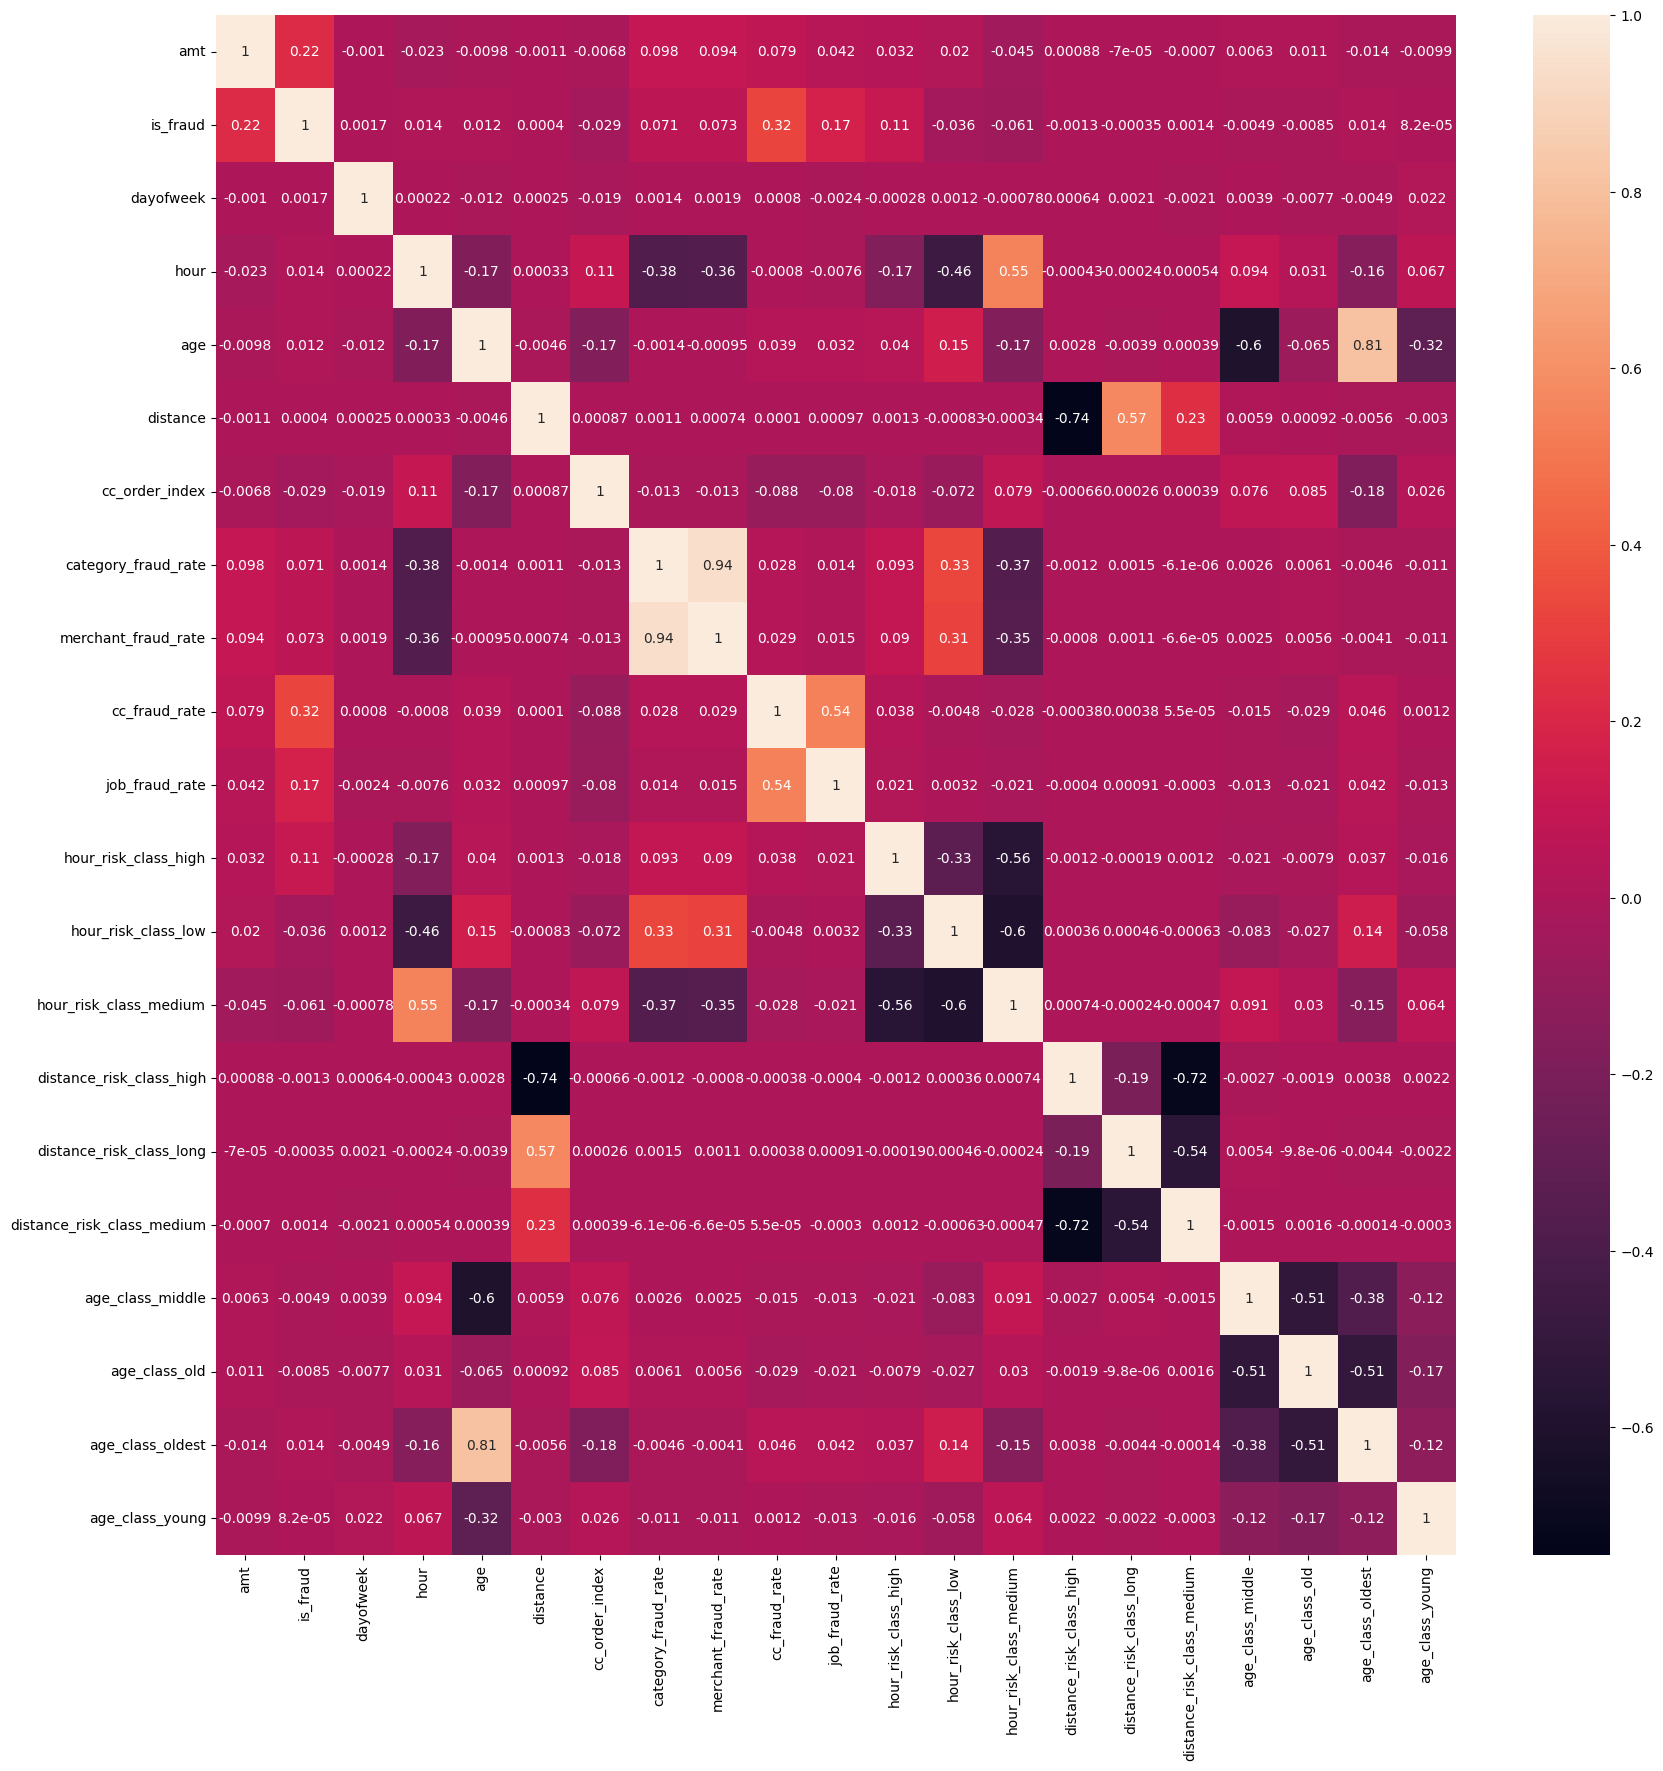

In [ ]:
corr = parsed_data.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
features  = parsed_data.drop(columns=['is_fraud'])
target    = parsed_data['is_fraud']

In [ ]:
features_scaled = minmax_scaling(features, columns=features.columns)

rob_scaler = RobustScaler()
features_scaled = rob_scaler.fit_transform(features_scaled)

sta_scaler = StandardScaler()
features_scaled = sta_scaler.fit_transform(features_scaled)

In [ ]:
features

,amt,dayofweek,hour,age,distance,cc_order_index,category_fraud_rate,merchant_fraud_rate,cc_fraud_rate,job_fraud_rate,hour_risk_class_high,hour_risk_class_low,hour_risk_class_medium,distance_risk_class_high,distance_risk_class_long,distance_risk_class_medium,age_class_middle,age_class_old,age_class_oldest,age_class_young
0,4.97,1,0,30,78.597568,1,0.014458,0.014207,0.000000,0.001693,1,0,0,0,0,1,1,0,0,0
1,107.23,1,0,40,30.212176,1,0.014098,0.010787,0.000000,0.002157,1,0,0,1,0,0,0,1,0,0
2,220.11,1,0,56,108.206083,1,0.002478,0.002111,0.000000,0.015656,1,0,0,0,0,1,0,0,1,0
3,45.00,1,0,51,95.673231,1,0.004694,0.003444,0.030426,0.007905,1,0,0,0,0,1,0,1,0,0
4,41.96,1,0,32,77.556744,1,0.003139,0.003769,0.000000,0.000000,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,6,12,58,119.752136,62,0.002478,0.002622,0.005948,0.005338,0,0,1,0,1,0,0,0,1,0
1296671,51.70,6,12,40,75.104085,14,0.001651,0.002284,0.015066,0.015066,0,0,1,0,0,1,0,1,0,0
1296672,105.93,6,12,52,99.047734,69,0.001651,0.001079,0.005314,0.006103,0,0,1,0,0,1,0,1,0,0
1296673,74.90,6,12,39,84.627652,54,0.001651,0.002094,0.003953,0.003953,0,0,1,0,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight


In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(target),
                                                 y=target)
class_weights

array([ 0.50291118, 86.37589928])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size = 0.2, random_state = 25)

In [ ]:
def modeling_xgboost(X_train, y_train):
  model = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss'          # Evaluation metric to monitor during training
  )

  model.fit(X_train, y_train)

  return model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
def modeling_adaboost(X_train, y_train):
  model = AdaBoostClassifier(n_estimators=100)
  model.fit(X_train, y_train)
  return model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from keras import backend as K
import random

# Set seeds
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


def modeling_mlp(X_train, y_train):
  model = Sequential()
  model.add(Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=[len(features.keys())]))
  model.add(Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.0125)))
  model.add(Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.0125)))
  model.add(Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.015)))
  model.add(Dense(4, activation=tf.keras.layers.LeakyReLU(alpha=0.015)))
  model.add(Dense(4, activation=tf.keras.layers.LeakyReLU(alpha=0.015)))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])
  history = model.fit(X_train, y_train, epochs=1000, batch_size=20000, validation_split=0.2, verbose=0)

  return model, history

In [ ]:
from sklearn.linear_model import LogisticRegression
def modeling_logistic(X_train, y_train):
  model = LogisticRegression(solver='saga',penalty='l1', C=0.1)
  model.fit(X_train, y_train)
  return model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def modeling_randomforest(X_train, y_train):
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)
  return model

In [ ]:
def max_metric(history):
  max_precission = max(history.history['precision_m'])
  max_recall = max(history.history['recall_m'])
  max_f1 = max(history.history['f1_m'])
  max_val_precission = max(history.history['val_precision_m'])
  max_val_recall = max(history.history['val_recall_m'])
  max_val_f1 = max(history.history['val_f1_m'])

  print('max_precission -',max_precission)
  print('max_recall -',max_recall)
  print('max_f1 -',max_f1)
  print('max_val_precission -',max_val_precission)
  print('max_val_recall -',max_val_recall)
  print('max_val_f1 -',max_val_f1)

def evaluate_model_mlp(model,X_test, y_test):
  y_pred_prob = model.predict(X_test)
  threshold = 0.5
  y_pred = (y_pred_prob >= threshold).astype(int)
  print(classification_report(y_test, y_pred))

  confusion_mtx = confusion_matrix(y_test, y_pred)
  f,ax = plt.subplots(figsize=(6, 6))
  sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

  return classification_report(y_test, y_pred), confusion_mtx

In [ ]:
def evaluate_model(model,X_test, y_test):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

  confusion_mtx = confusion_matrix(y_test, y_pred)
  f,ax = plt.subplots(figsize=(6, 6))
  sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

  return classification_report(y_test, y_pred), confusion_mtx

In [ ]:
def train_and_evaluate(features_train, target_train):
  print("------ MLP Modeling -------")
  print("------ Modeling -------")
  mlp_modeling , history = modeling_mlp(features_train, target_train)
  print("------ Train Evaluate -------")
  evaluate_model_mlp(mlp_modeling,features_train, target_train)
  print("------ Test Evaluate -------")
  mlp_classification_report,mlp_confusion_mtx = evaluate_model_mlp(mlp_modeling,X_test, y_test)
  print("--------------------------------\n\n\n")



  print("------ XG Boost Modeling -------")
  print("------ Modeling -------")
  XGB_model = modeling_xgboost(features_train, target_train)
  print("------ Train Evaluate -------")
  evaluate_model(XGB_model,features_train, target_train)
  print("------ Test Evaluate -------")
  xgb_classification_report,xgb_confusion_mtx = evaluate_model(XGB_model,X_test, y_test)
  print("--------------------------------\n\n\n")



  print("------ Logistic Regression Modeling -------")
  print("------ Modeling -------")
  log_model = modeling_logistic(features_train, target_train)
  print("------ Train Evaluate -------")
  evaluate_model(log_model,features_train, target_train)
  print("------ Test Evaluate -------")
  log_classification_report,log_confusion_mtx = evaluate_model(log_model,X_test, y_test)
  print("--------------------------------\n\n\n")



  print("------ Random Forest Modeling -------")
  print("------ Modeling -------")
  rf_model = modeling_randomforest(features_train, target_train)
  print("------ Train Evaluate -------")
  evaluate_model(rf_model,features_train, target_train)
  print("------ Test Evaluate -------")
  rf_classification_report,rf_confusion_mtx = evaluate_model(rf_model,X_test, y_test)
  print("--------------------------------\n\n\n")

  return {
      "mlp":{
          "model": mlp_modeling,
          "classification_report": mlp_classification_report,
          "confusion_mtx": mlp_confusion_mtx
      },
      "xgb":{
          "model": XGB_model,
          "classification_report": xgb_classification_report,
          "confusion_mtx": xgb_confusion_mtx
      },
      "log":{
          "model": log_model,
          "classification_report": log_classification_report,
          "confusion_mtx": log_confusion_mtx
      },
      "rf":{
          "model": rf_model,
          "classification_report": rf_classification_report,
          "confusion_mtx": rf_confusion_mtx
      }
  }

------ MLP Modeling -------
------ Modeling -------
------ Train Evaluate -------
32417/32417 [==============================] - 52s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031302
           1       0.92      0.76      0.83      6038

    accuracy                           1.00   1037340
   macro avg       0.96      0.88      0.92   1037340
weighted avg       1.00      1.00      1.00   1037340



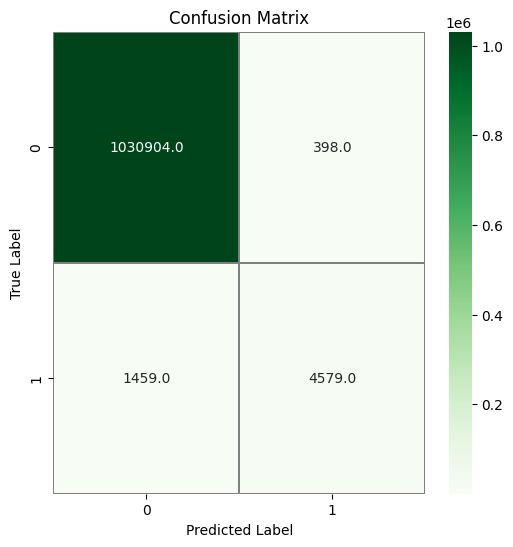

------ Test Evaluate -------
8105/8105 [==============================] - 13s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.89      0.74      0.81      1468

    accuracy                           1.00    259335
   macro avg       0.94      0.87      0.90    259335
weighted avg       1.00      1.00      1.00    259335



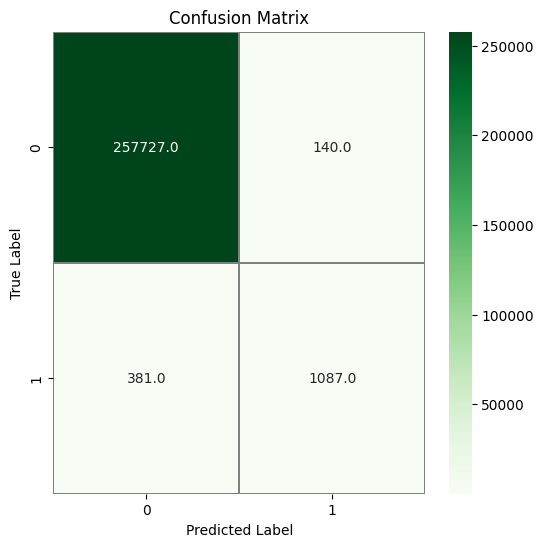

--------------------------------



------ XG Boost Modeling -------
------ Modeling -------
------ Train Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031302
           1       0.98      0.89      0.93      6038

    accuracy                           1.00   1037340
   macro avg       0.99      0.95      0.97   1037340
weighted avg       1.00      1.00      1.00   1037340



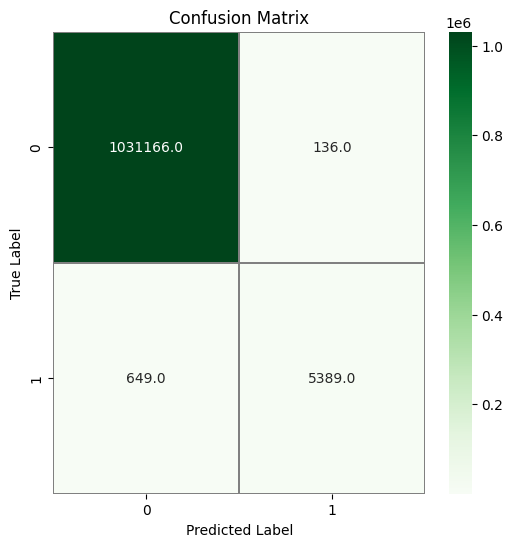

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.94      0.85      0.89      1468

    accuracy                           1.00    259335
   macro avg       0.97      0.92      0.94    259335
weighted avg       1.00      1.00      1.00    259335



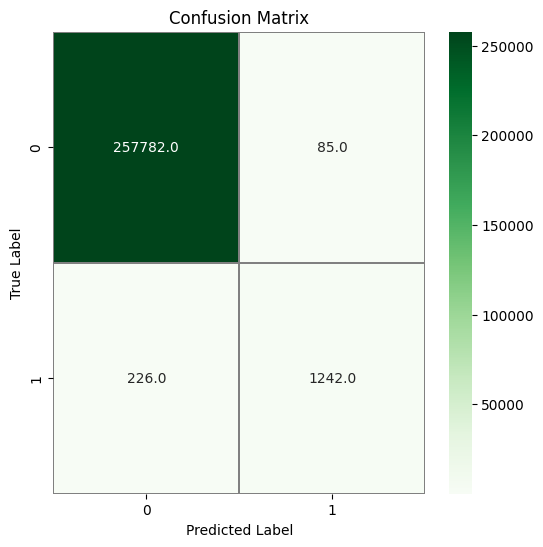

--------------------------------



------ Logistic Regression Modeling -------
------ Modeling -------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


------ Train Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031302
           1       0.76      0.18      0.29      6038

    accuracy                           0.99   1037340
   macro avg       0.88      0.59      0.64   1037340
weighted avg       0.99      0.99      0.99   1037340



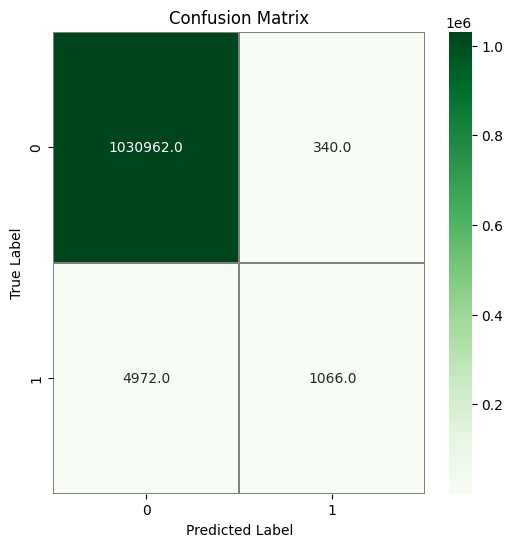

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.78      0.20      0.32      1468

    accuracy                           1.00    259335
   macro avg       0.89      0.60      0.66    259335
weighted avg       0.99      1.00      0.99    259335



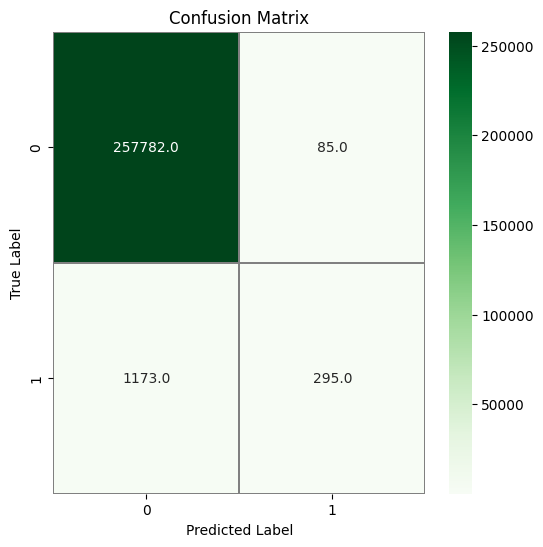

--------------------------------



------ Random Forest Modeling -------
------ Modeling -------
------ Train Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031302
           1       1.00      1.00      1.00      6038

    accuracy                           1.00   1037340
   macro avg       1.00      1.00      1.00   1037340
weighted avg       1.00      1.00      1.00   1037340



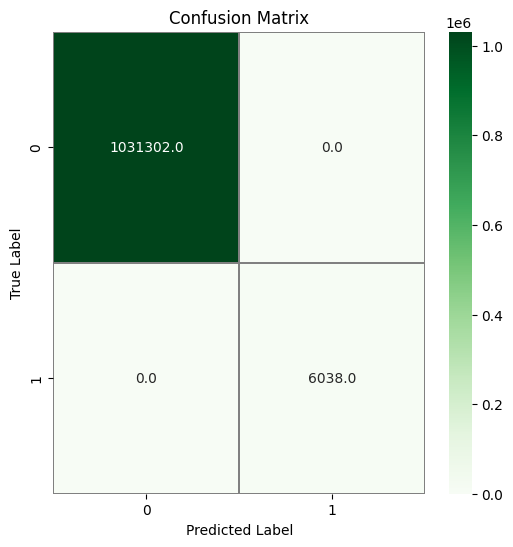

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.95      0.75      0.84      1468

    accuracy                           1.00    259335
   macro avg       0.98      0.87      0.92    259335
weighted avg       1.00      1.00      1.00    259335



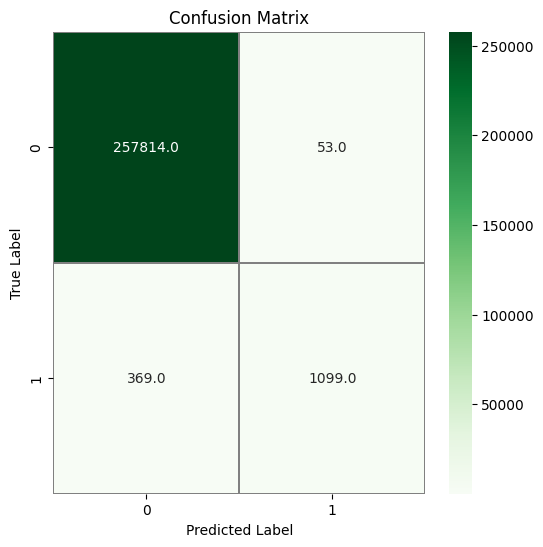

--------------------------------





In [ ]:
default_data_results = train_and_evaluate(X_train, y_train)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train, y_train)

------ MLP Modeling -------
------ Modeling -------
------ Train Evaluate -------
64457/64457 [==============================] - 102s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1031302
           1       0.99      1.00      0.99   1031302

    accuracy                           0.99   2062604
   macro avg       0.99      0.99      0.99   2062604
weighted avg       0.99      0.99      0.99   2062604



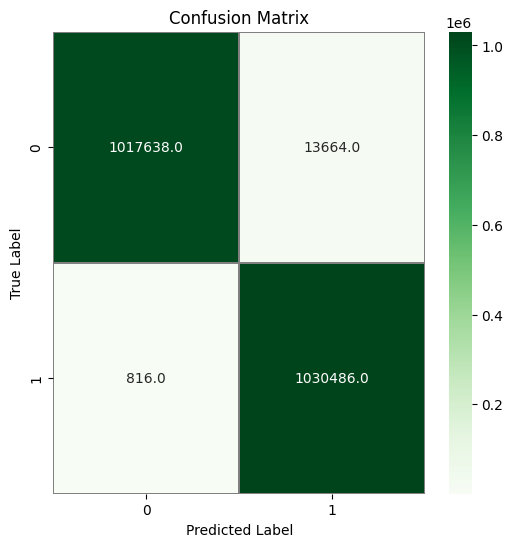

------ Test Evaluate -------
8105/8105 [==============================] - 13s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257867
           1       0.28      0.93      0.42      1468

    accuracy                           0.99    259335
   macro avg       0.64      0.96      0.71    259335
weighted avg       1.00      0.99      0.99    259335



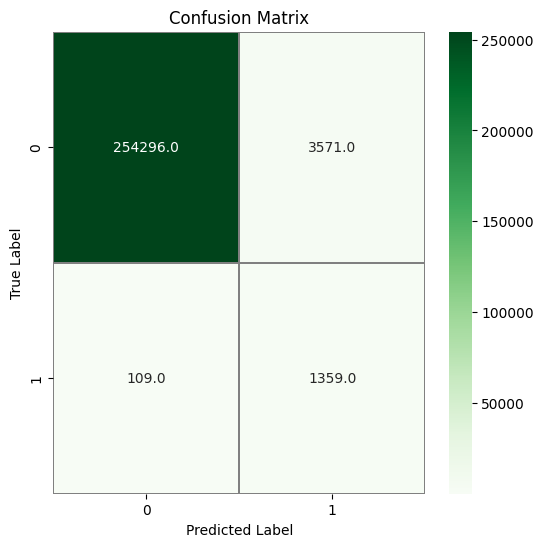

--------------------------------



------ XG Boost Modeling -------
------ Modeling -------
------ Train Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031302
           1       1.00      1.00      1.00   1031302

    accuracy                           1.00   2062604
   macro avg       1.00      1.00      1.00   2062604
weighted avg       1.00      1.00      1.00   2062604



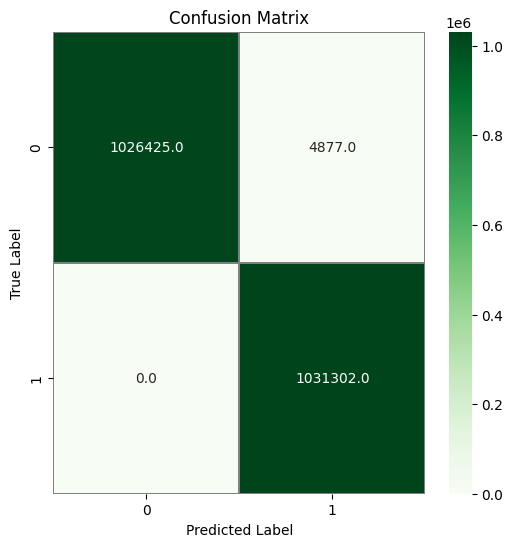

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    257867
           1       0.51      0.96      0.67      1468

    accuracy                           0.99    259335
   macro avg       0.76      0.98      0.83    259335
weighted avg       1.00      0.99      1.00    259335



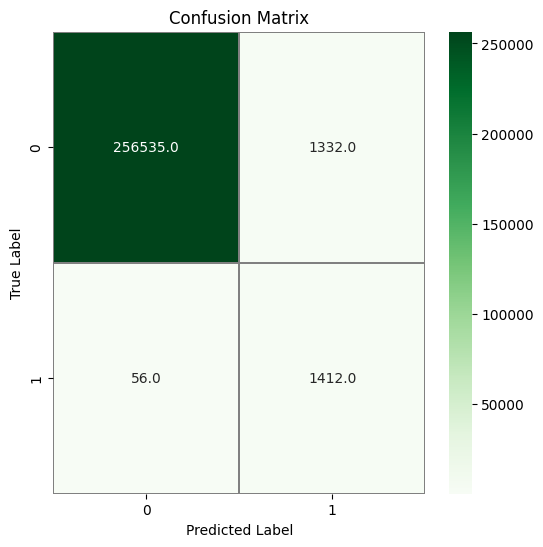

--------------------------------



------ Logistic Regression Modeling -------
------ Modeling -------
------ Train Evaluate -------
              precision    recall  f1-score   support

           0       0.87      0.90      0.89   1031302
           1       0.90      0.86      0.88   1031302

    accuracy                           0.88   2062604
   macro avg       0.88      0.88      0.88   2062604
weighted avg       0.88      0.88      0.88   2062604



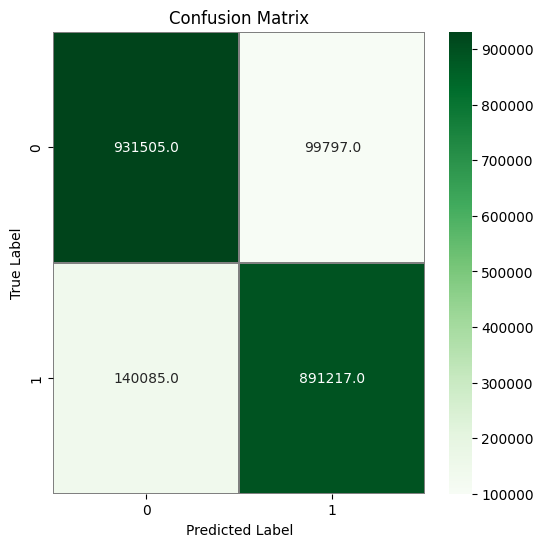

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    257867
           1       0.05      0.86      0.09      1468

    accuracy                           0.90    259335
   macro avg       0.52      0.88      0.52    259335
weighted avg       0.99      0.90      0.94    259335



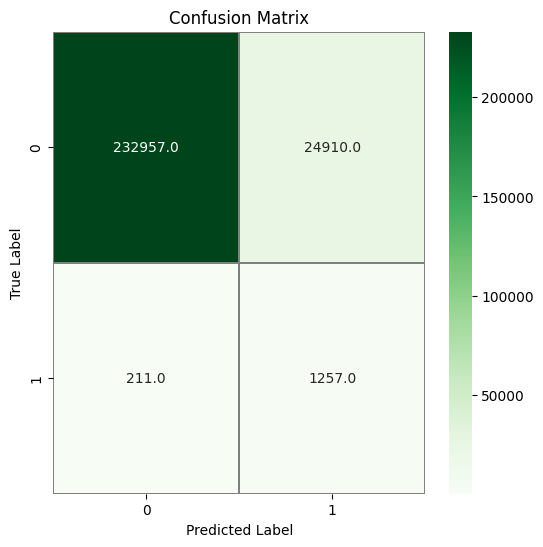

--------------------------------



------ Random Forest Modeling -------
------ Modeling -------
------ Train Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031302
           1       1.00      1.00      1.00   1031302

    accuracy                           1.00   2062604
   macro avg       1.00      1.00      1.00   2062604
weighted avg       1.00      1.00      1.00   2062604



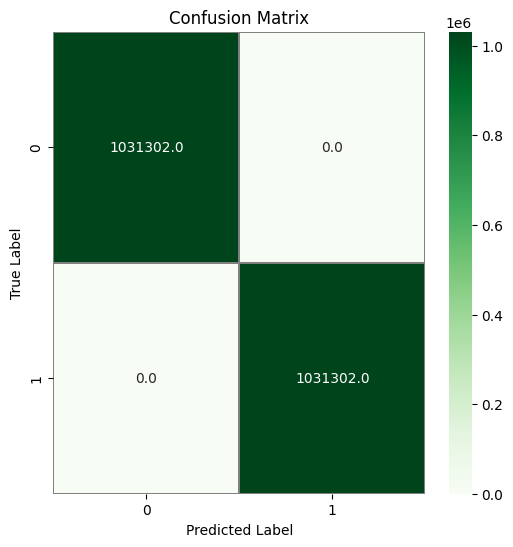

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.94      0.78      0.85      1468

    accuracy                           1.00    259335
   macro avg       0.97      0.89      0.93    259335
weighted avg       1.00      1.00      1.00    259335



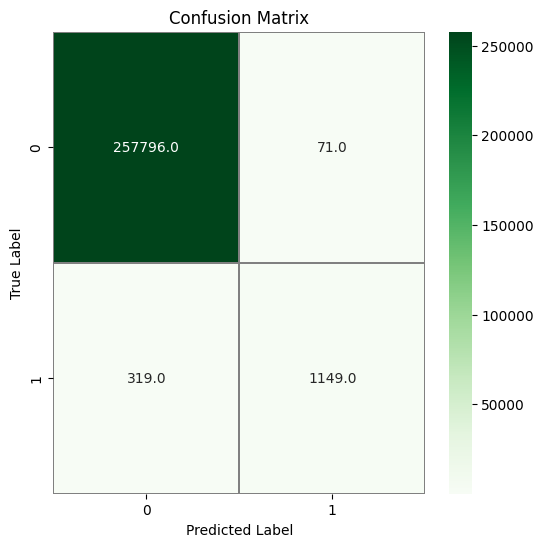

--------------------------------





In [ ]:
ROS_data_results = train_and_evaluate(X_over, y_over)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)

------ MLP Modeling -------
------ Modeling -------
------ Train Evaluate -------
378/378 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6038
           1       0.99      0.95      0.97      6038

    accuracy                           0.97     12076
   macro avg       0.97      0.97      0.97     12076
weighted avg       0.97      0.97      0.97     12076



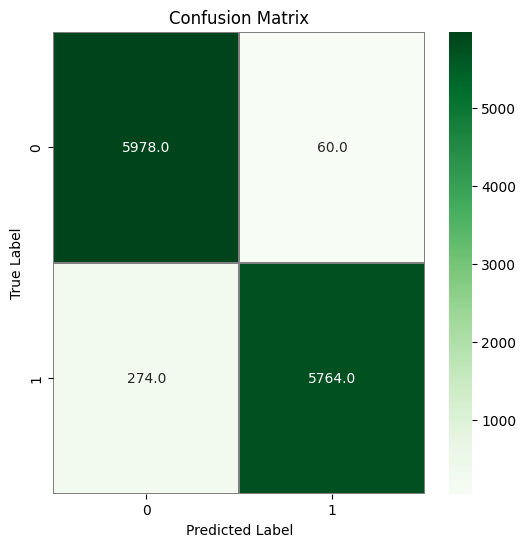

------ Test Evaluate -------
8105/8105 [==============================] - 13s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257867
           1       0.09      0.92      0.17      1468

    accuracy                           0.95    259335
   macro avg       0.55      0.93      0.57    259335
weighted avg       0.99      0.95      0.97    259335



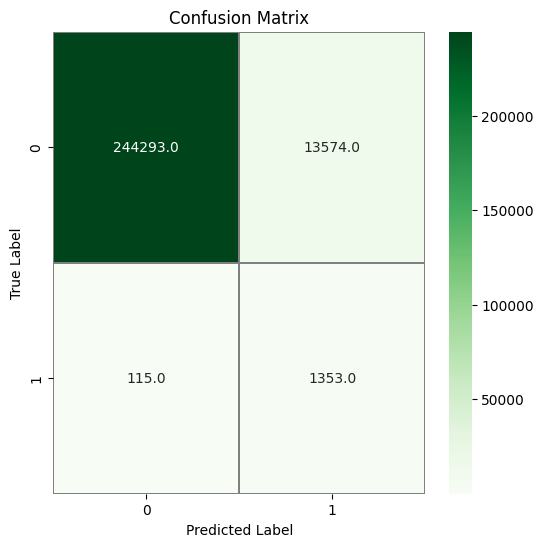

--------------------------------



------ XG Boost Modeling -------
------ Modeling -------
------ Train Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6038
           1       1.00      1.00      1.00      6038

    accuracy                           1.00     12076
   macro avg       1.00      1.00      1.00     12076
weighted avg       1.00      1.00      1.00     12076



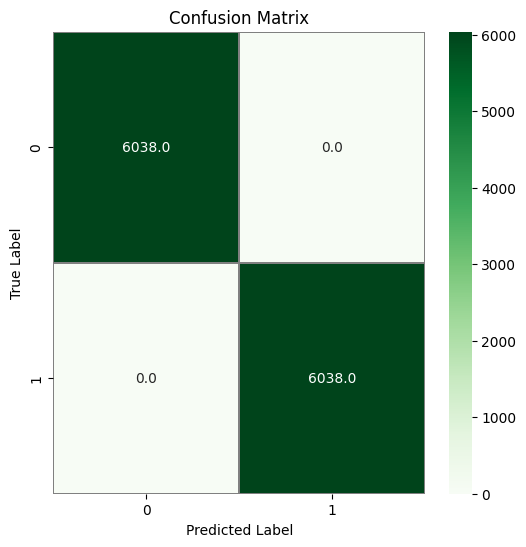

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257867
           1       0.19      0.98      0.32      1468

    accuracy                           0.98    259335
   macro avg       0.60      0.98      0.66    259335
weighted avg       1.00      0.98      0.98    259335



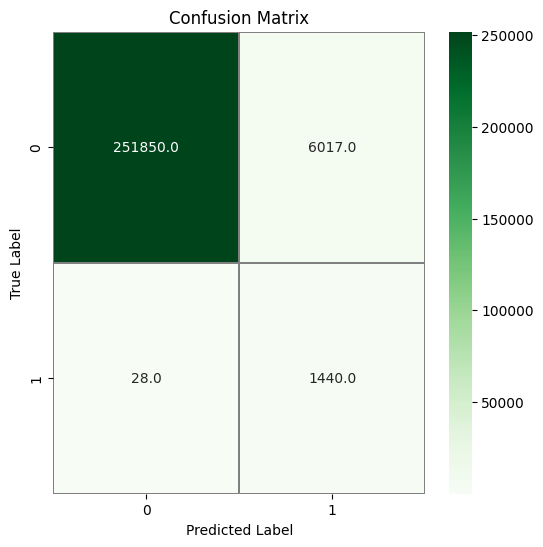

--------------------------------



------ Logistic Regression Modeling -------
------ Modeling -------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


------ Train Evaluate -------
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      6038
           1       0.90      0.86      0.88      6038

    accuracy                           0.88     12076
   macro avg       0.88      0.88      0.88     12076
weighted avg       0.88      0.88      0.88     12076



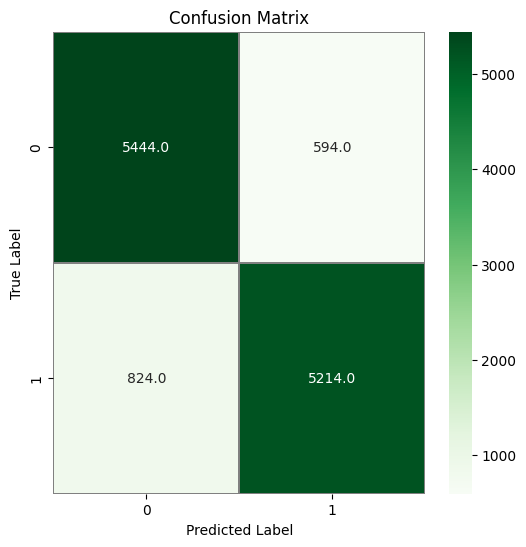

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    257867
           1       0.05      0.85      0.09      1468

    accuracy                           0.90    259335
   macro avg       0.52      0.88      0.52    259335
weighted avg       0.99      0.90      0.94    259335



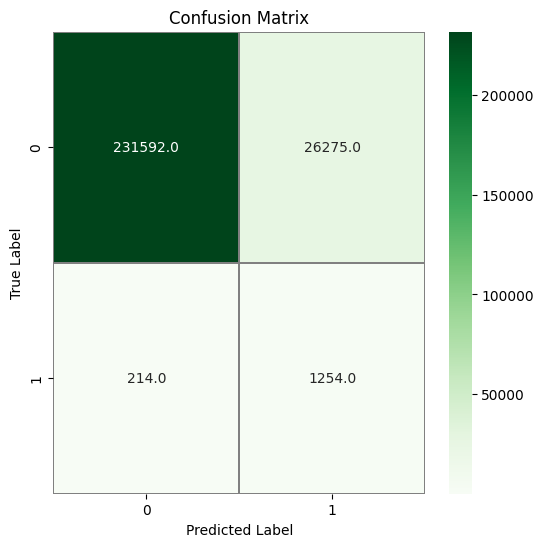

--------------------------------



------ Random Forest Modeling -------
------ Modeling -------
------ Train Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6038
           1       1.00      1.00      1.00      6038

    accuracy                           1.00     12076
   macro avg       1.00      1.00      1.00     12076
weighted avg       1.00      1.00      1.00     12076



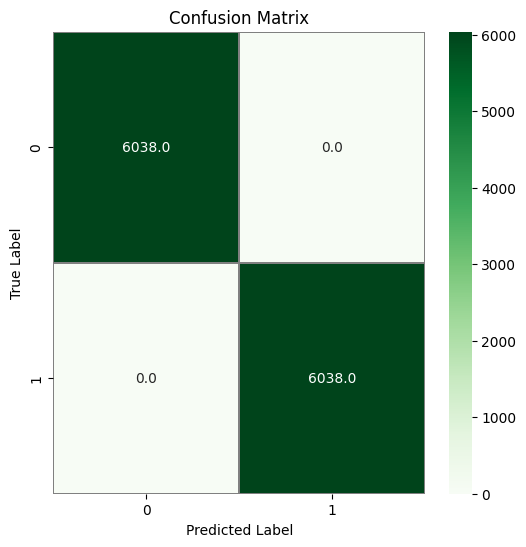

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    257867
           1       0.15      0.97      0.25      1468

    accuracy                           0.97    259335
   macro avg       0.57      0.97      0.62    259335
weighted avg       0.99      0.97      0.98    259335



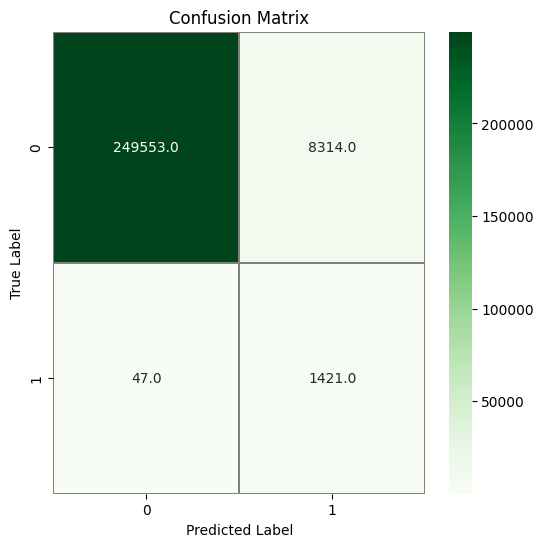

--------------------------------





In [ ]:
RUS_data_results = train_and_evaluate(X_under, y_under)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

------ MLP Modeling -------
------ Modeling -------
------ Train Evaluate -------
64457/64457 [==============================] - 102s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99   1031302
           1       0.98      0.99      0.99   1031302

    accuracy                           0.99   2062604
   macro avg       0.99      0.99      0.99   2062604
weighted avg       0.99      0.99      0.99   2062604



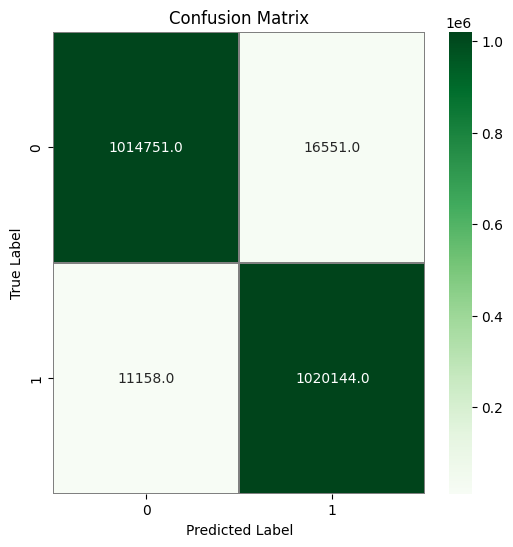

------ Test Evaluate -------
8105/8105 [==============================] - 13s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257867
           1       0.24      0.92      0.38      1468

    accuracy                           0.98    259335
   macro avg       0.62      0.95      0.68    259335
weighted avg       1.00      0.98      0.99    259335



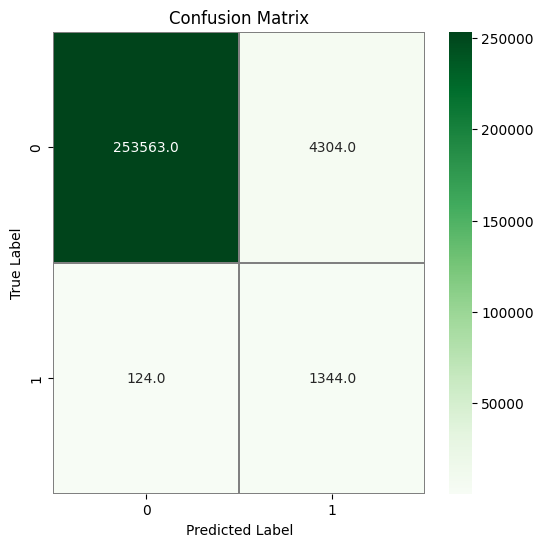

--------------------------------



------ XG Boost Modeling -------
------ Modeling -------
------ Train Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031302
           1       1.00      1.00      1.00   1031302

    accuracy                           1.00   2062604
   macro avg       1.00      1.00      1.00   2062604
weighted avg       1.00      1.00      1.00   2062604



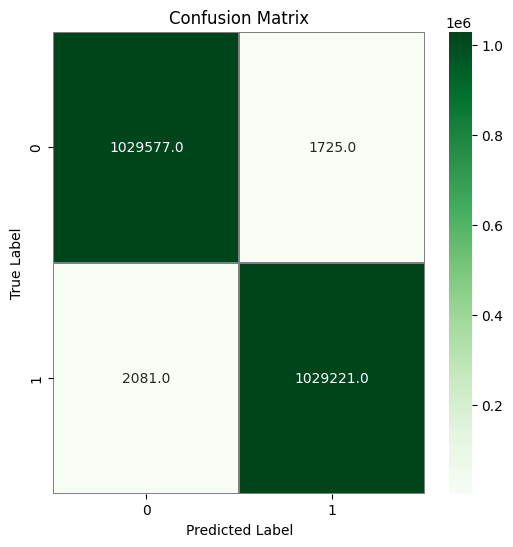

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.72      0.88      0.80      1468

    accuracy                           1.00    259335
   macro avg       0.86      0.94      0.90    259335
weighted avg       1.00      1.00      1.00    259335



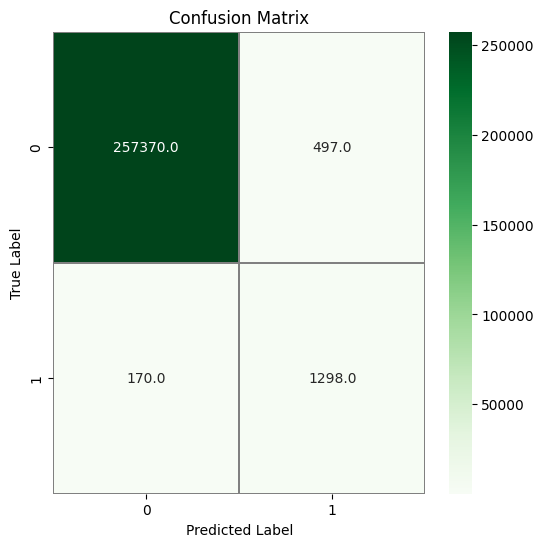

--------------------------------



------ Logistic Regression Modeling -------
------ Modeling -------
------ Train Evaluate -------
              precision    recall  f1-score   support

           0       0.87      0.90      0.89   1031302
           1       0.90      0.87      0.88   1031302

    accuracy                           0.89   2062604
   macro avg       0.89      0.89      0.89   2062604
weighted avg       0.89      0.89      0.89   2062604



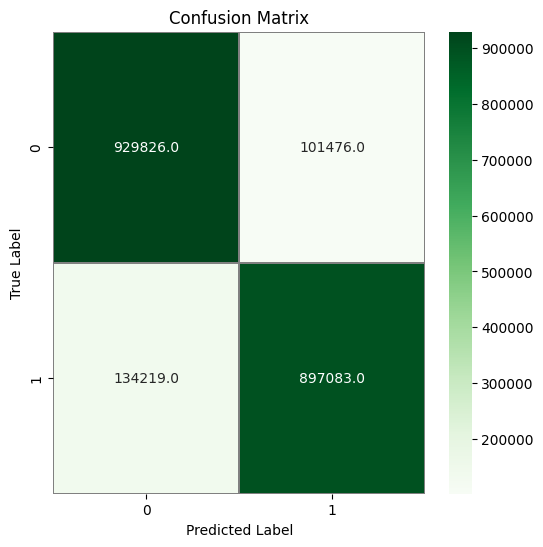

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    257867
           1       0.05      0.86      0.09      1468

    accuracy                           0.90    259335
   macro avg       0.52      0.88      0.52    259335
weighted avg       0.99      0.90      0.94    259335



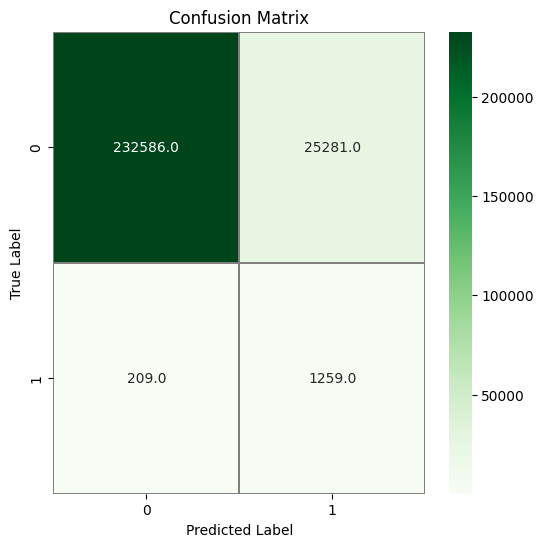

--------------------------------



------ Random Forest Modeling -------
------ Modeling -------
------ Train Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031302
           1       1.00      1.00      1.00   1031302

    accuracy                           1.00   2062604
   macro avg       1.00      1.00      1.00   2062604
weighted avg       1.00      1.00      1.00   2062604



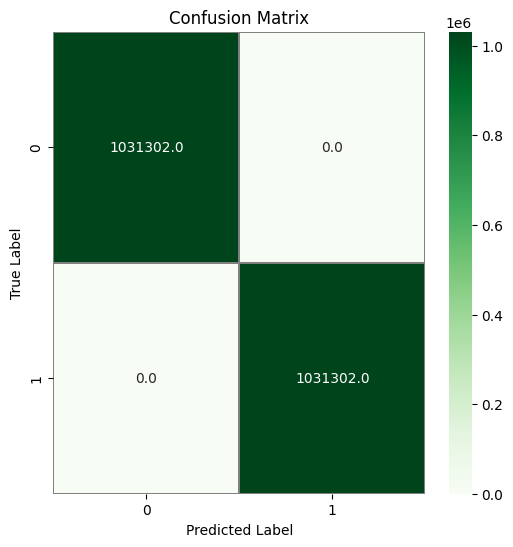

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.87      0.82      0.84      1468

    accuracy                           1.00    259335
   macro avg       0.94      0.91      0.92    259335
weighted avg       1.00      1.00      1.00    259335



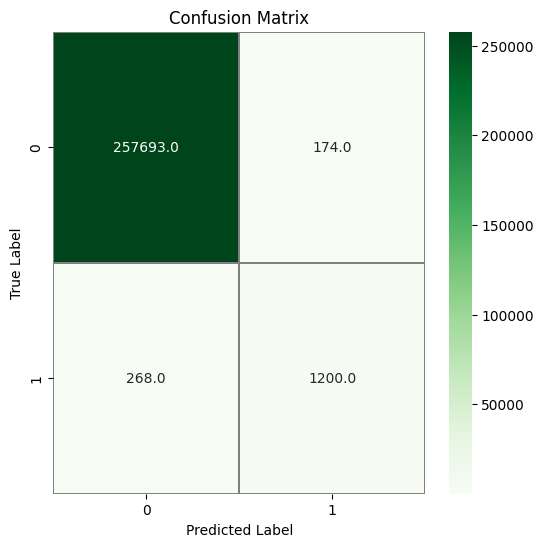

--------------------------------





In [ ]:
SMOTE_data_results = train_and_evaluate(X_smote, y_smote)

In [ ]:
for key in default_data_results.keys():
  print(f"=======-------      {key} Default      ------========\n")
  print(default_data_results[key]['classification_report'])
  print(f"=======-------#################------========\n\n\n")

for key in ROS_data_results.keys():
  print(f"=======-------      {key} ROS      ------========\n")
  print(ROS_data_results[key]['classification_report'])
  print(f"=======-------#################------========\n\n\n")

for key in RUS_data_results.keys():
  print(f"=======-------      {key} RUS      ------========\n")
  print(RUS_data_results[key]['classification_report'])
  print(f"=======-------#################------========\n\n\n")

for key in SMOTE_data_results.keys():
  print(f"=======-------      {key} SMOTE      ------========\n")
  print(SMOTE_data_results[key]['classification_report'])
  print(f"=======-------#################------========\n\n\n")

=======-------      mlp Default      ------========

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.89      0.74      0.81      1468

    accuracy                           1.00    259335
   macro avg       0.94      0.87      0.90    259335
weighted avg       1.00      1.00      1.00    259335

=======-------#################------========



=======-------      xgb Default      ------========

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.94      0.85      0.89      1468

    accuracy                           1.00    259335
   macro avg       0.97      0.92      0.94    259335
weighted avg       1.00      1.00      1.00    259335

=======-------#################------========



=======-------      log Default      ------========

              precision    recall  f1-score   support

           0       1.00      1.00 

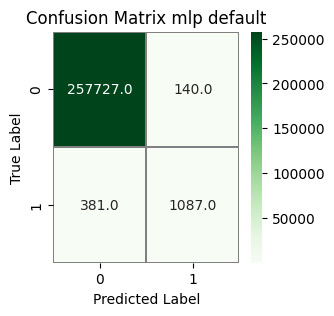

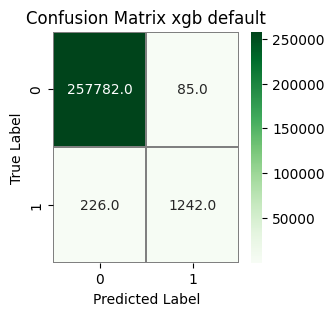

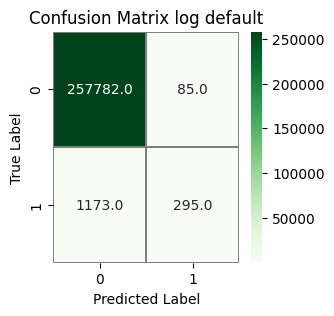

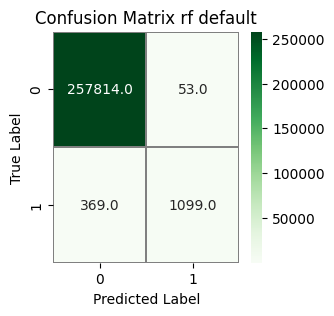

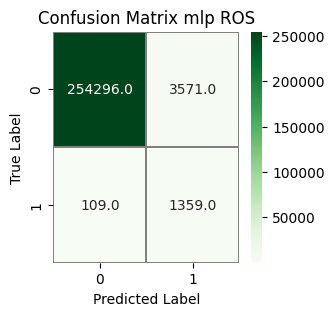

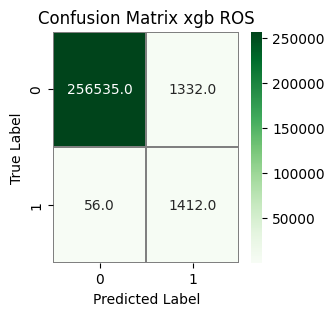

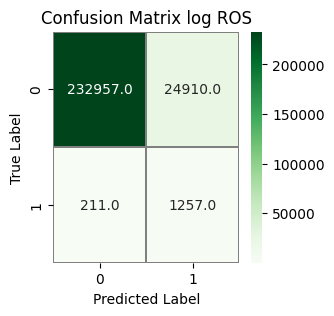

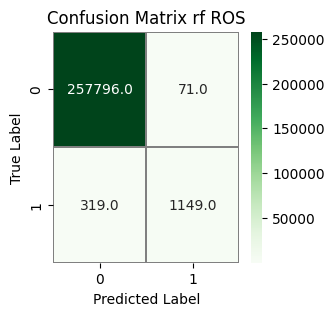

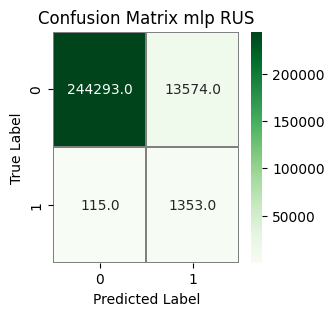

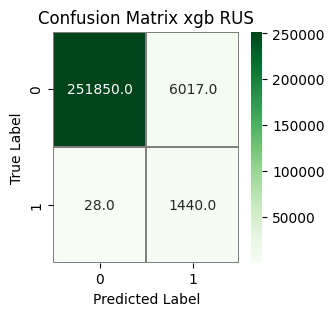

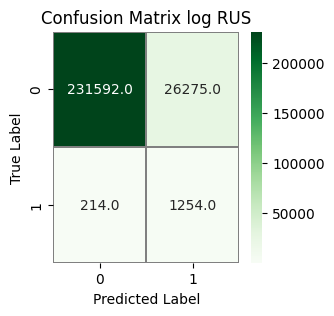

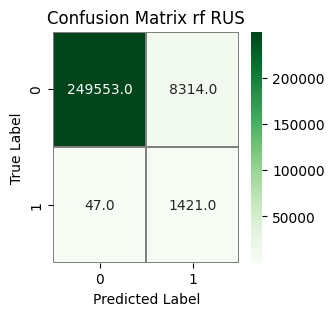

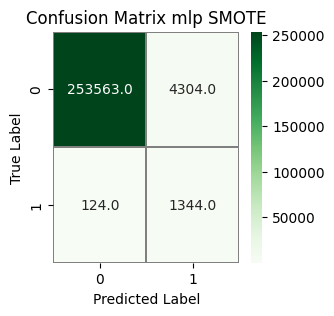

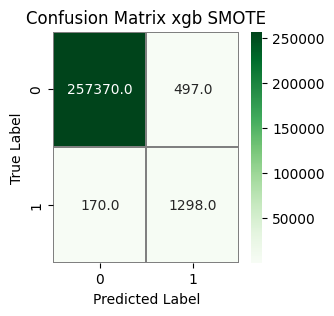

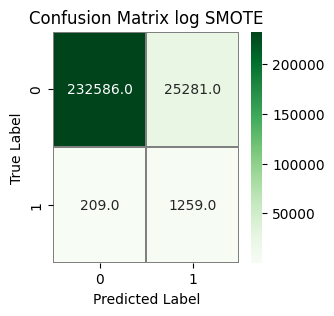

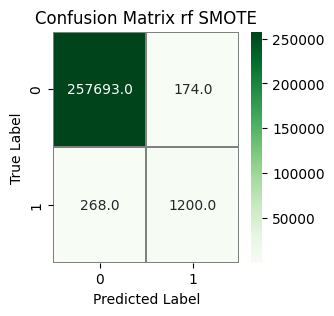

In [ ]:
def plot_cm(cm,key,data):
  f,ax = plt.subplots(figsize=(3, 3))
  sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title(f"Confusion Matrix {key} {data}")
  plt.show()

for key in default_data_results.keys():
  confusion_mtx=default_data_results[key]['confusion_mtx']
  plot_cm(confusion_mtx,key,'default')

for key in ROS_data_results.keys():
  confusion_mtx=ROS_data_results[key]['confusion_mtx']
  plot_cm(confusion_mtx,key,'ROS')

for key in RUS_data_results.keys():
  confusion_mtx=RUS_data_results[key]['confusion_mtx']
  plot_cm(confusion_mtx,key,'RUS')

for key in SMOTE_data_results.keys():
  confusion_mtx=SMOTE_data_results[key]['confusion_mtx']
  plot_cm(confusion_mtx,key,'SMOTE')


In [ ]:
from sklearn.metrics import f1_score, make_scorer

In [ ]:
best_model = default_data_results['xgb']['model']

param_grid = {
    'n_estimators': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

f1_scorer = make_scorer(f1_score)

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, scoring=f1_scorer, cv=2, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [5, 10, 15]},
             scoring=make_scorer(f1_score), verbose=1)

In [ ]:
best_xgb = grid_search.best_estimator_

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.92      0.73      0.81      1468

    accuracy                           1.00    259335
   macro avg       0.96      0.86      0.91    259335
weighted avg       1.00      1.00      1.00    259335



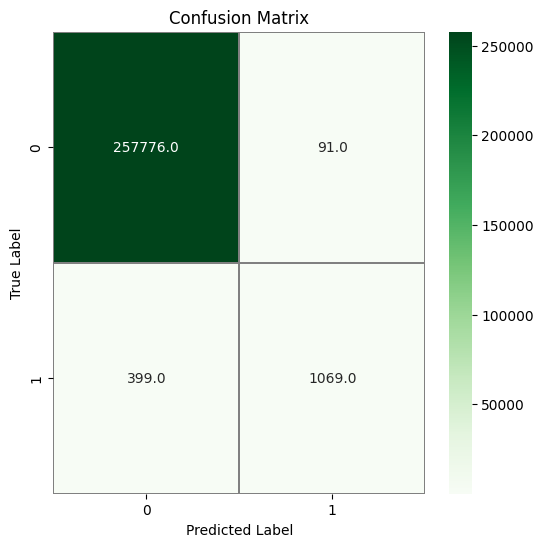

In [ ]:
y_pred = best_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

confusion_mtx = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/fraud_data/fraudTest.csv')

In [ ]:
parsed_test_data = parse_feature(data_test)

In [ ]:
parsed_test_data = parsed_test_data.drop(columns=[
    'Unnamed: 0',
    'first',
    'last',
    'gender',
    'street',
    'zip',
    'state',
    'city_pop',
    'trans_num',
    'unix_time',
    'trans_date_trans_time',
    'city',
    'date',
    'year',
    'month',
    'day',
    'dob',
    'time',
    'second',
    'minute',
    'lat',
    'long',
    'merch_lat',
    'merch_long',
    'merchant',
    'category',
    'job',
    'cc_num',
])

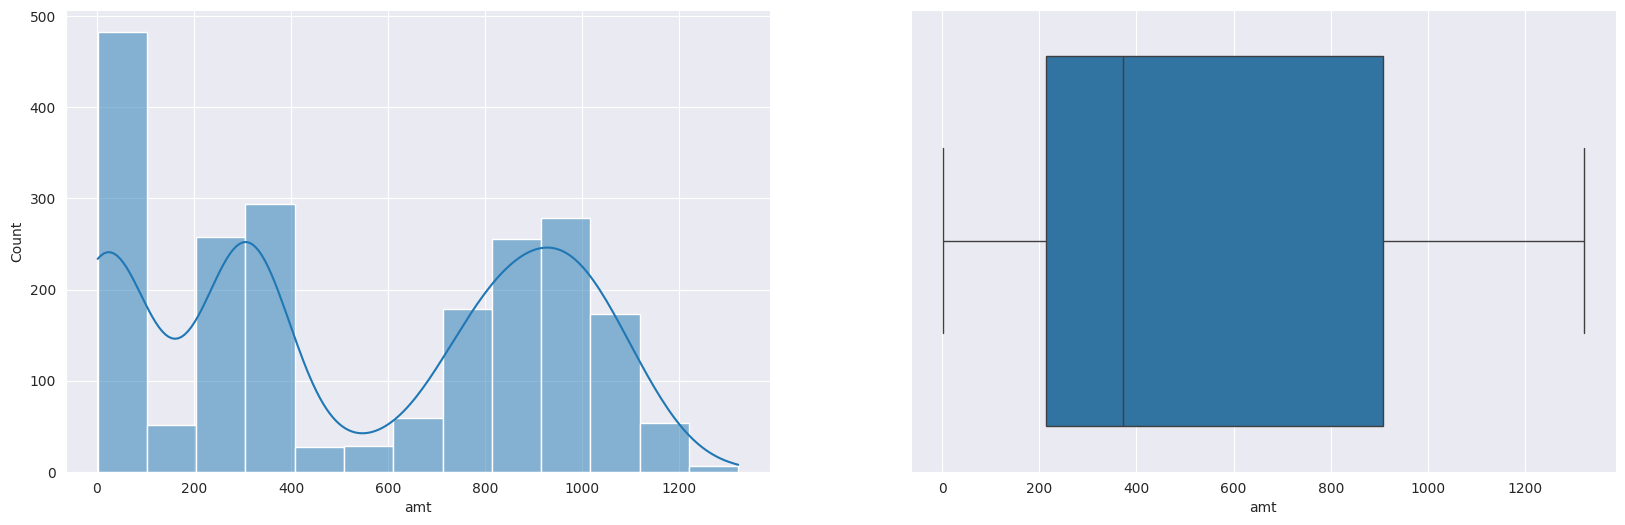

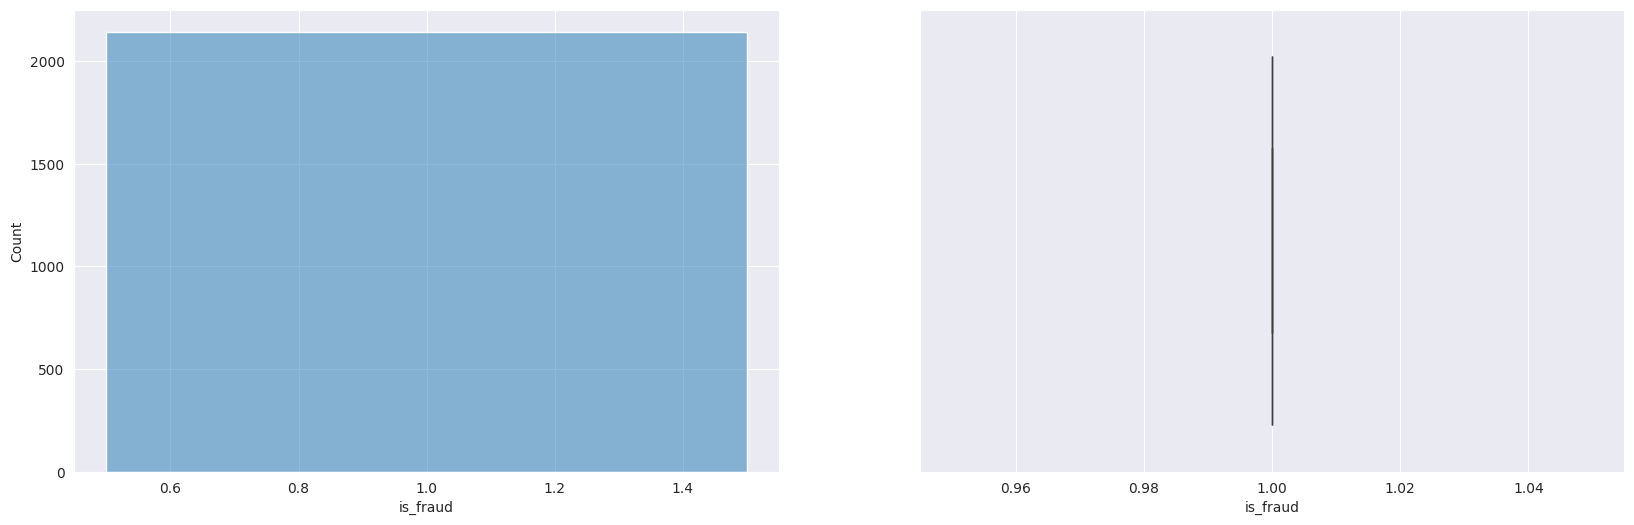

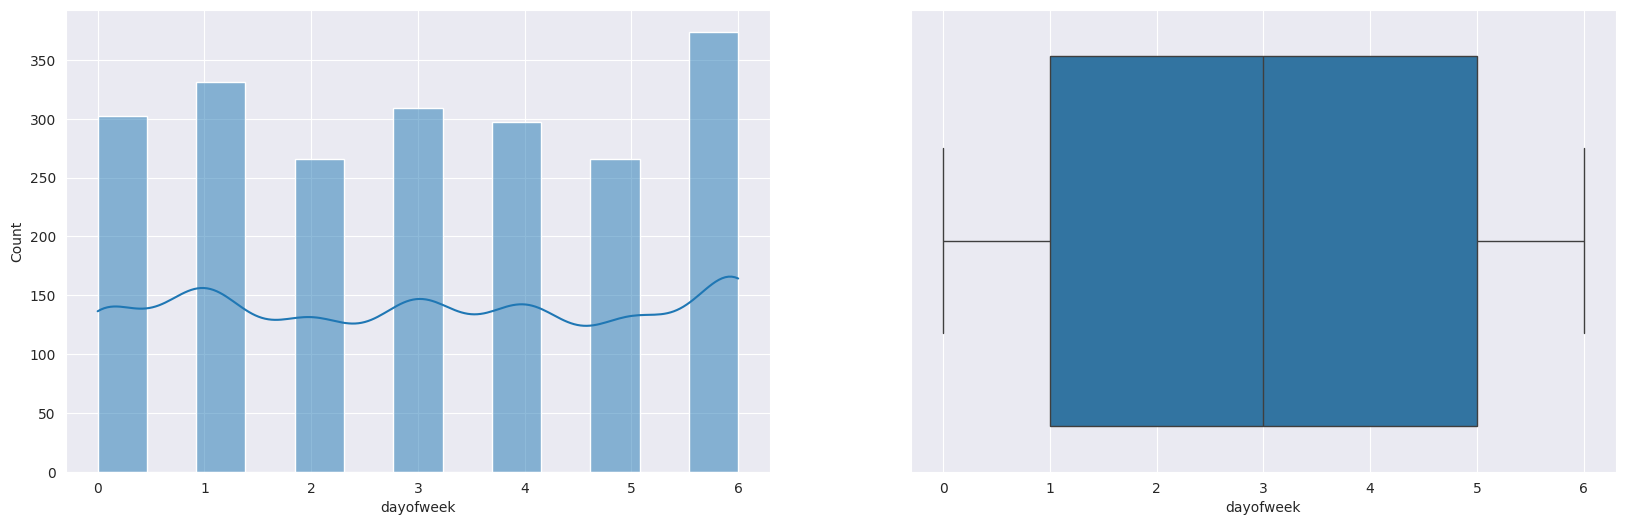

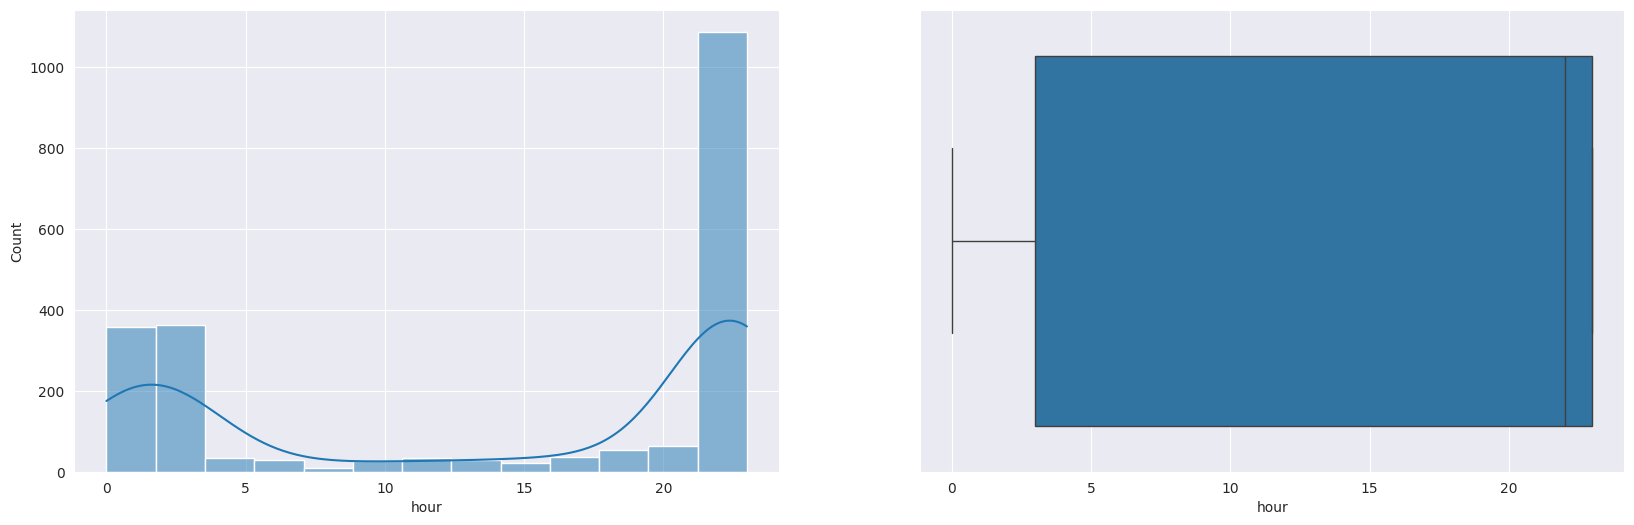

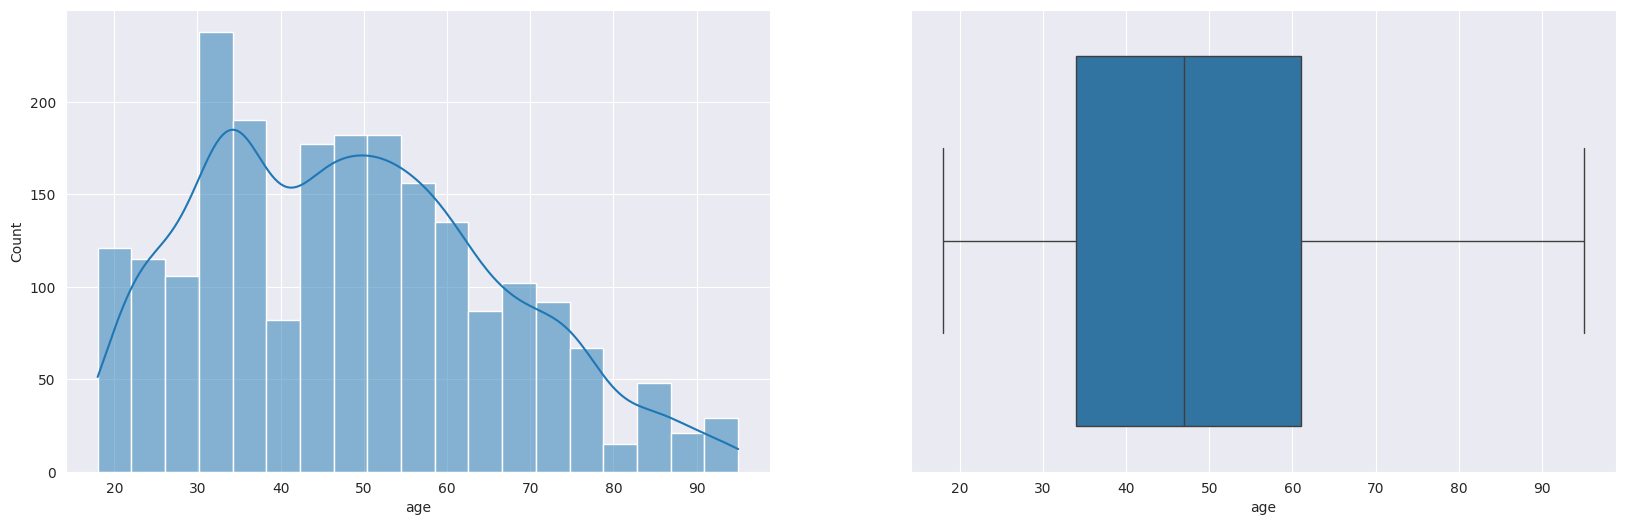

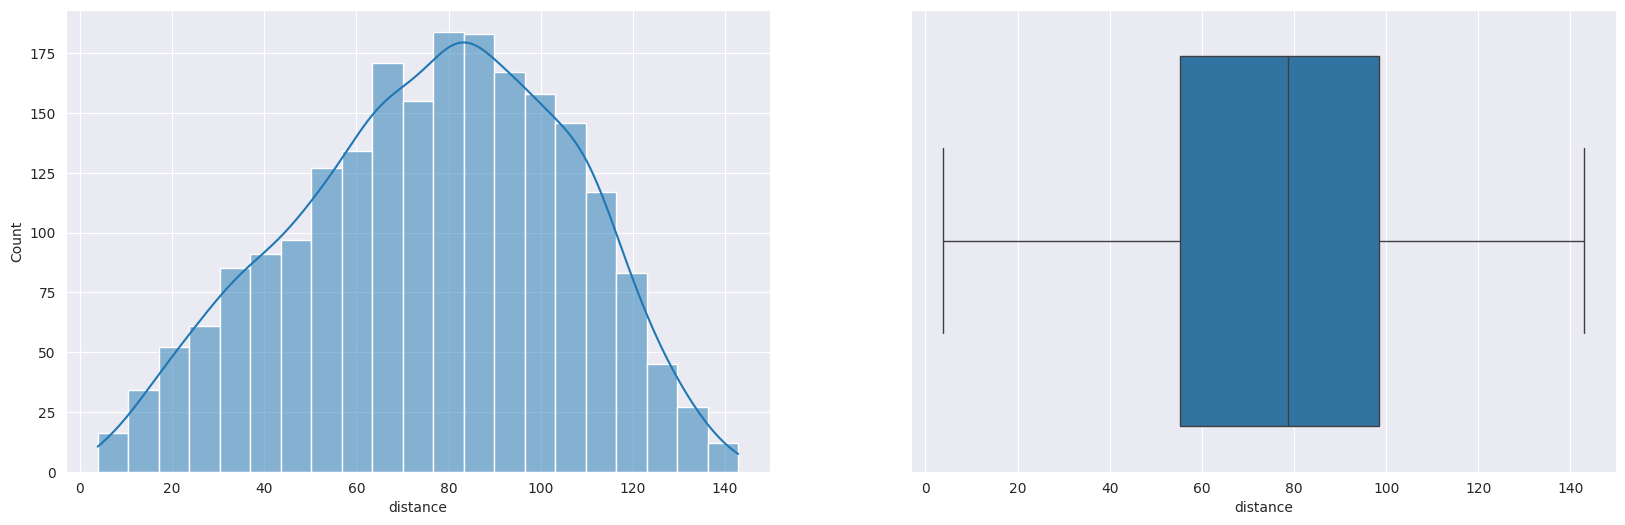

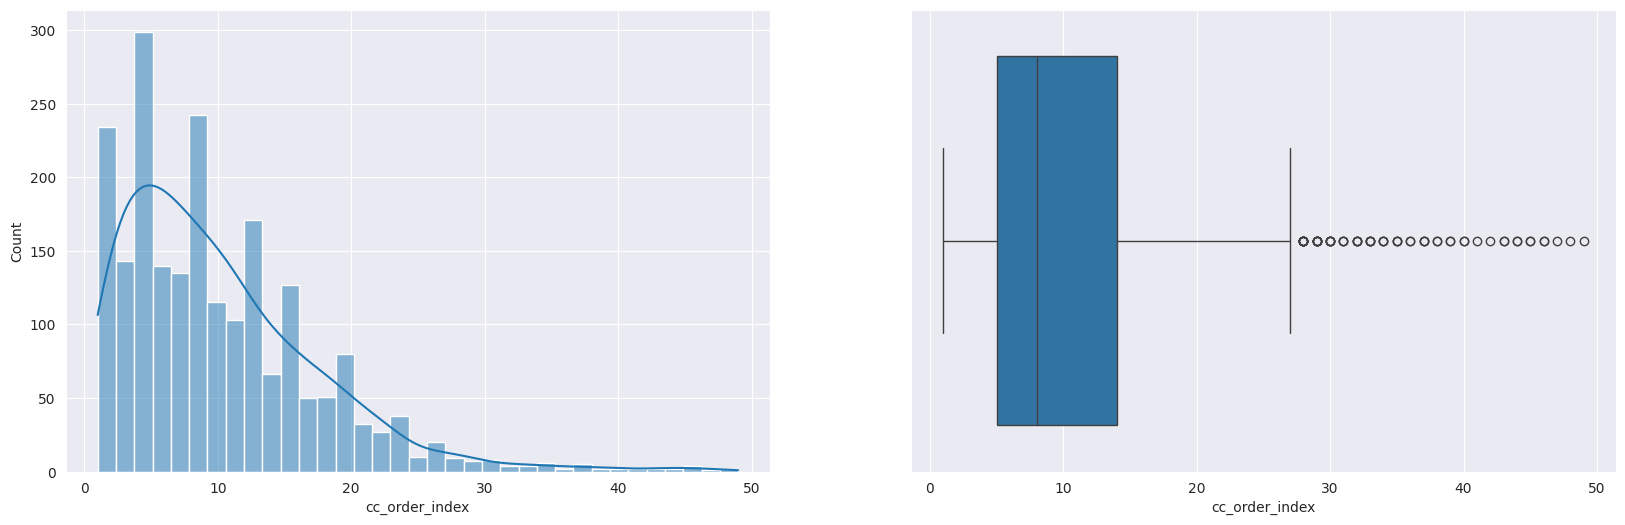

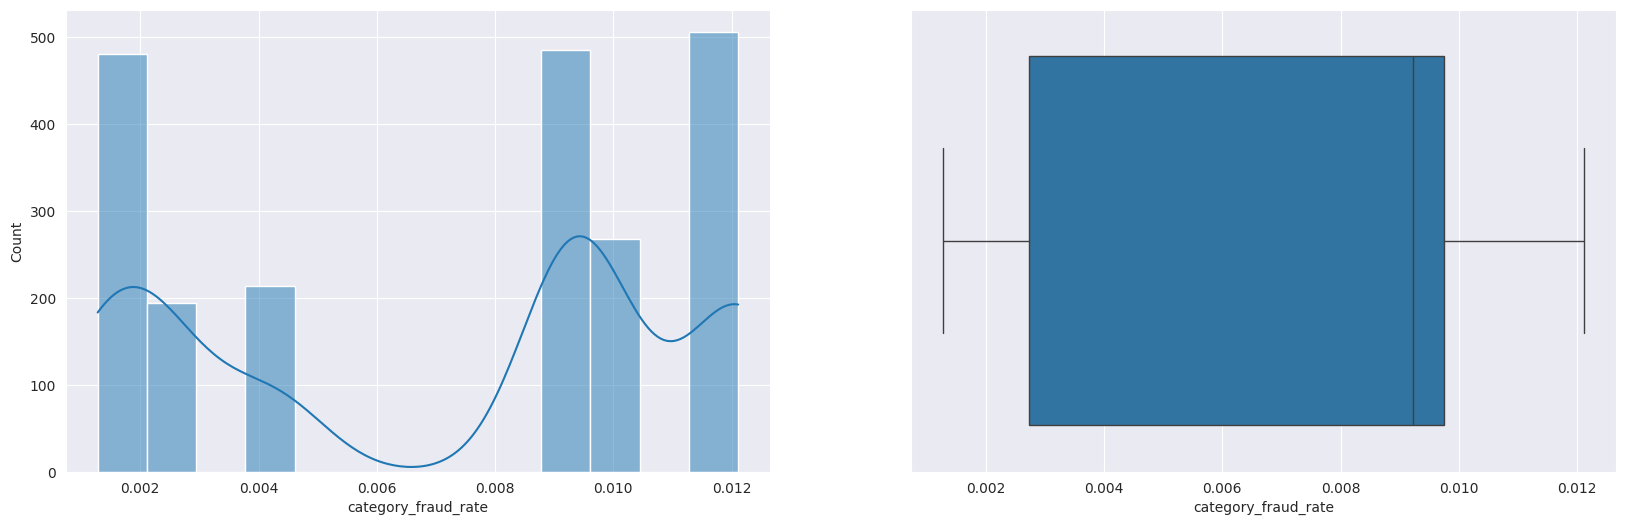

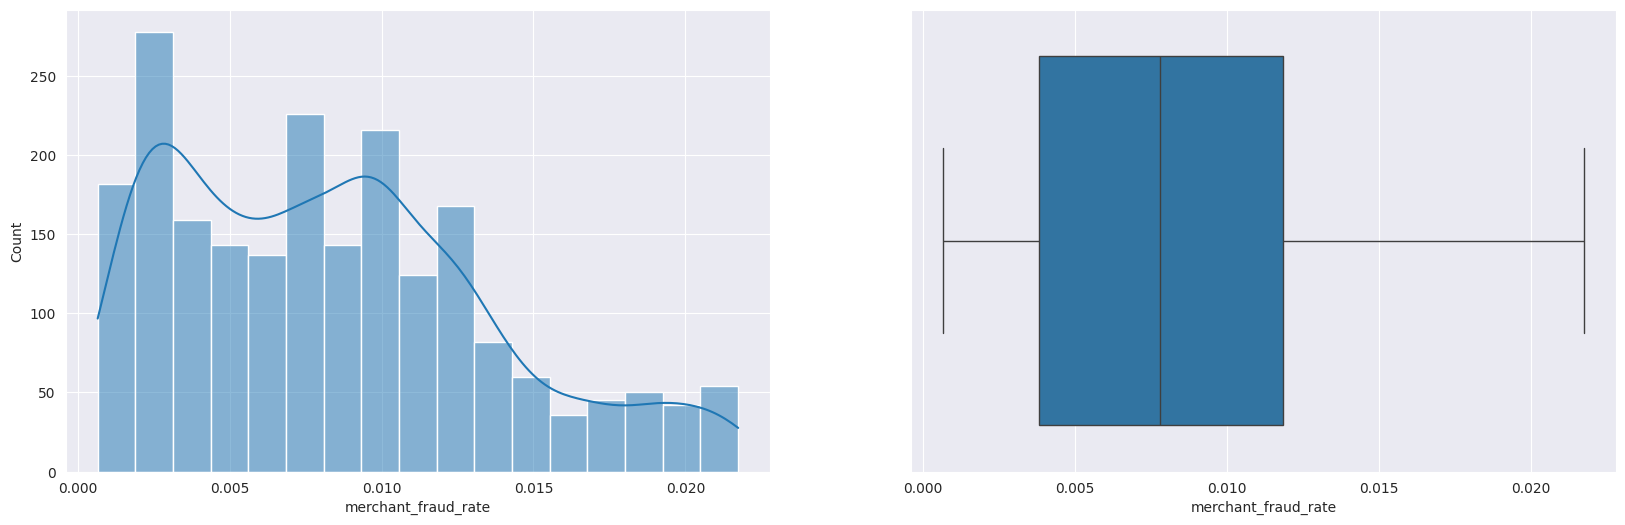

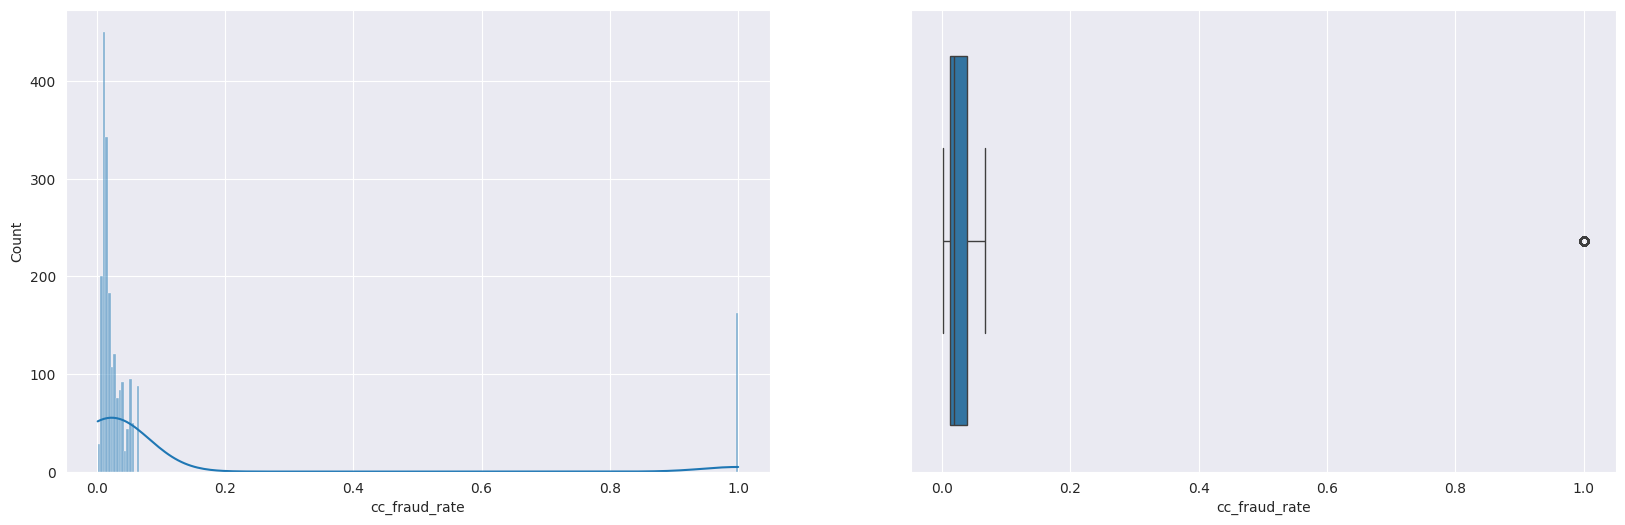

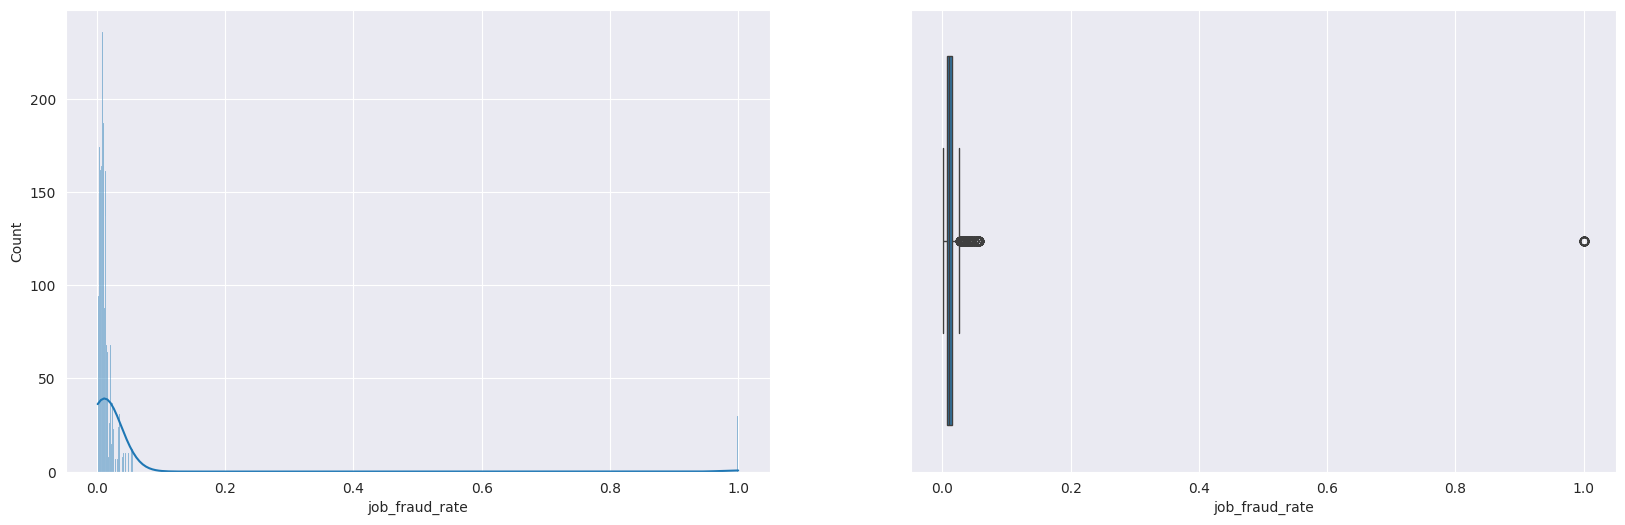

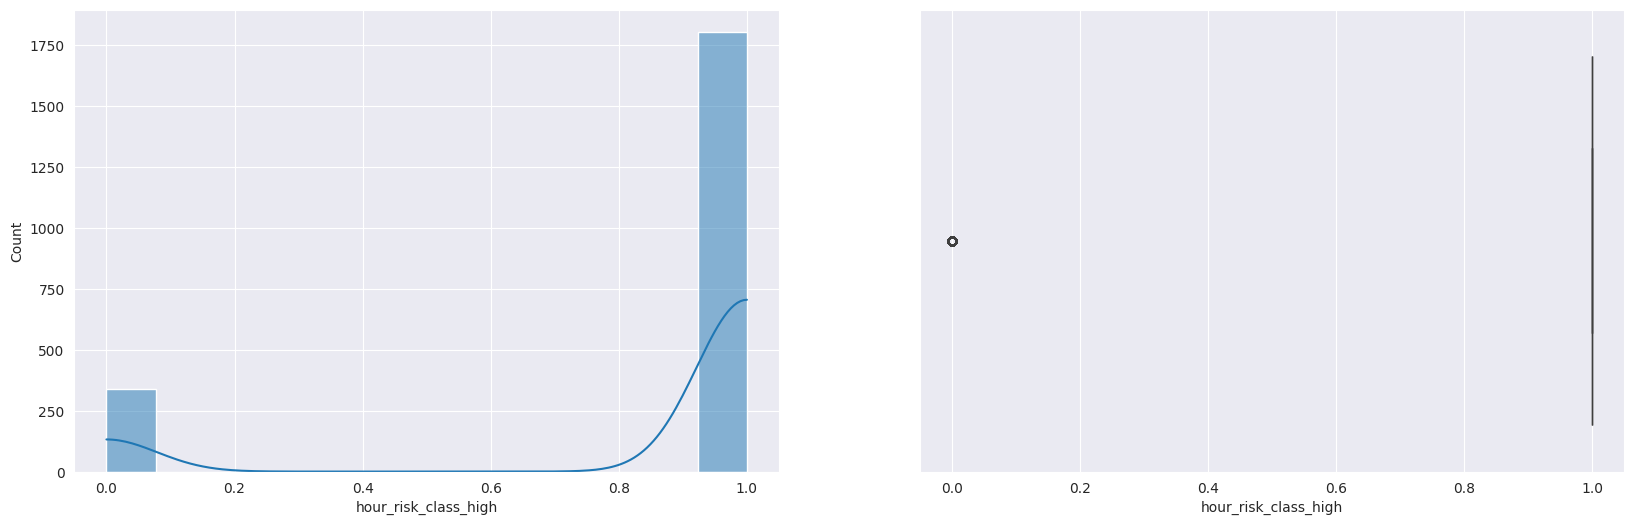

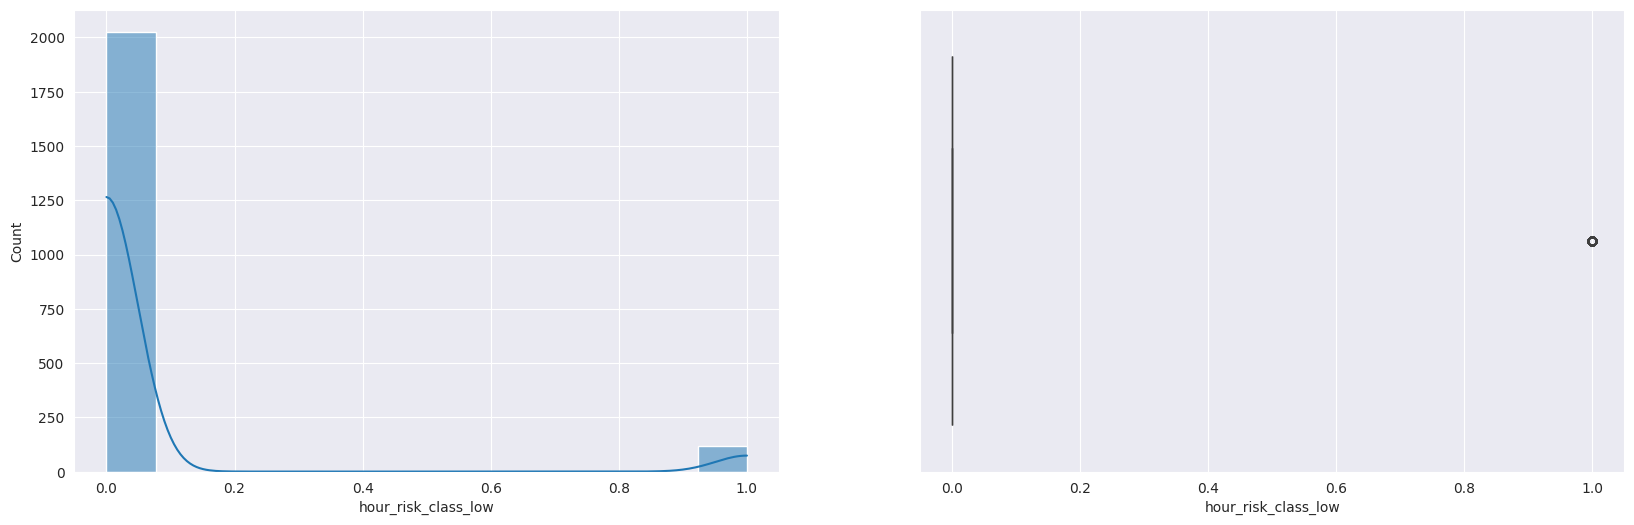

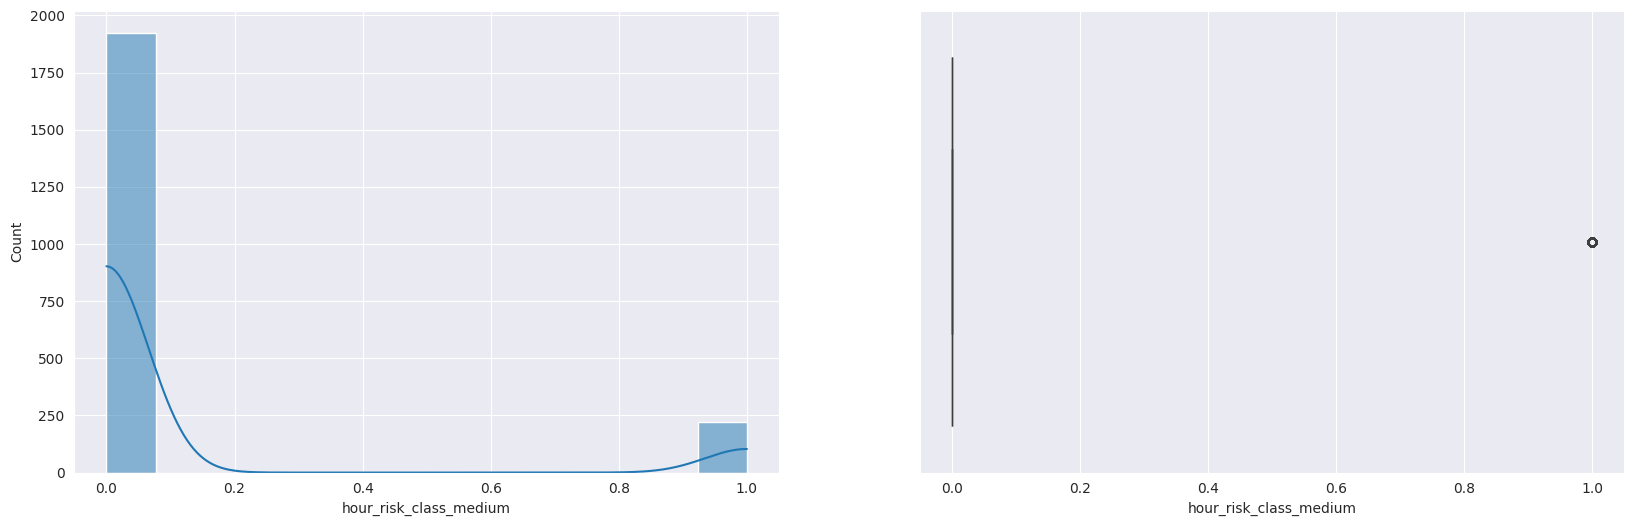

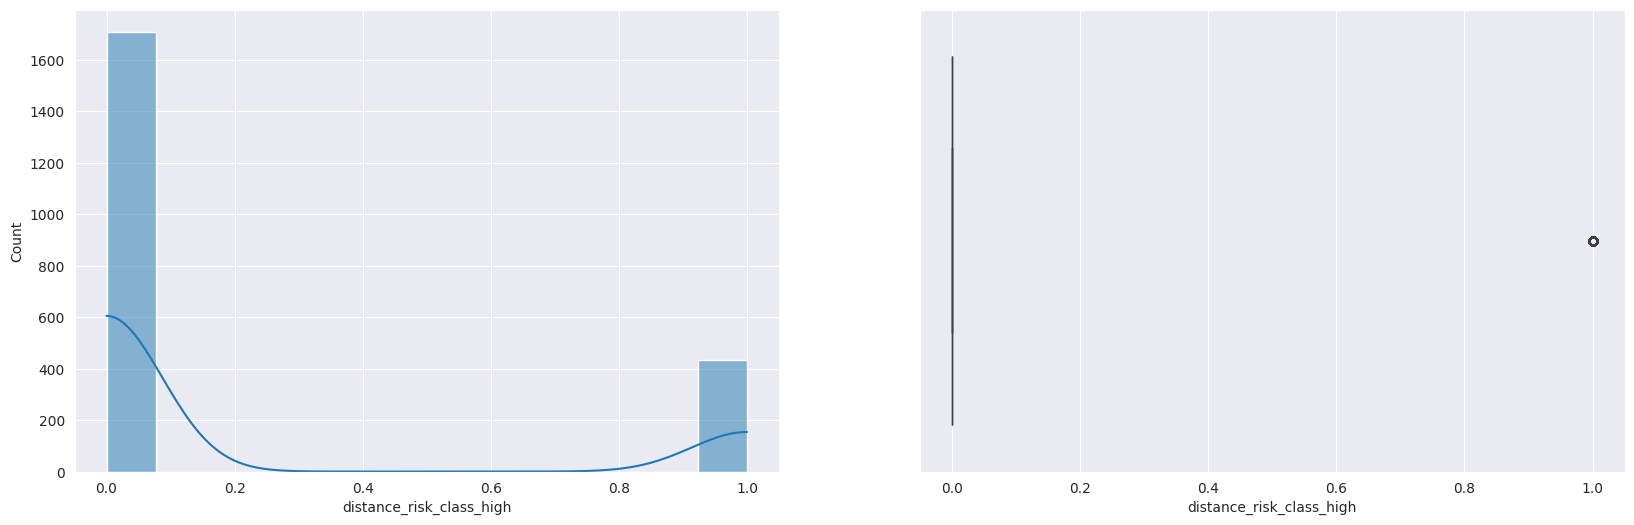

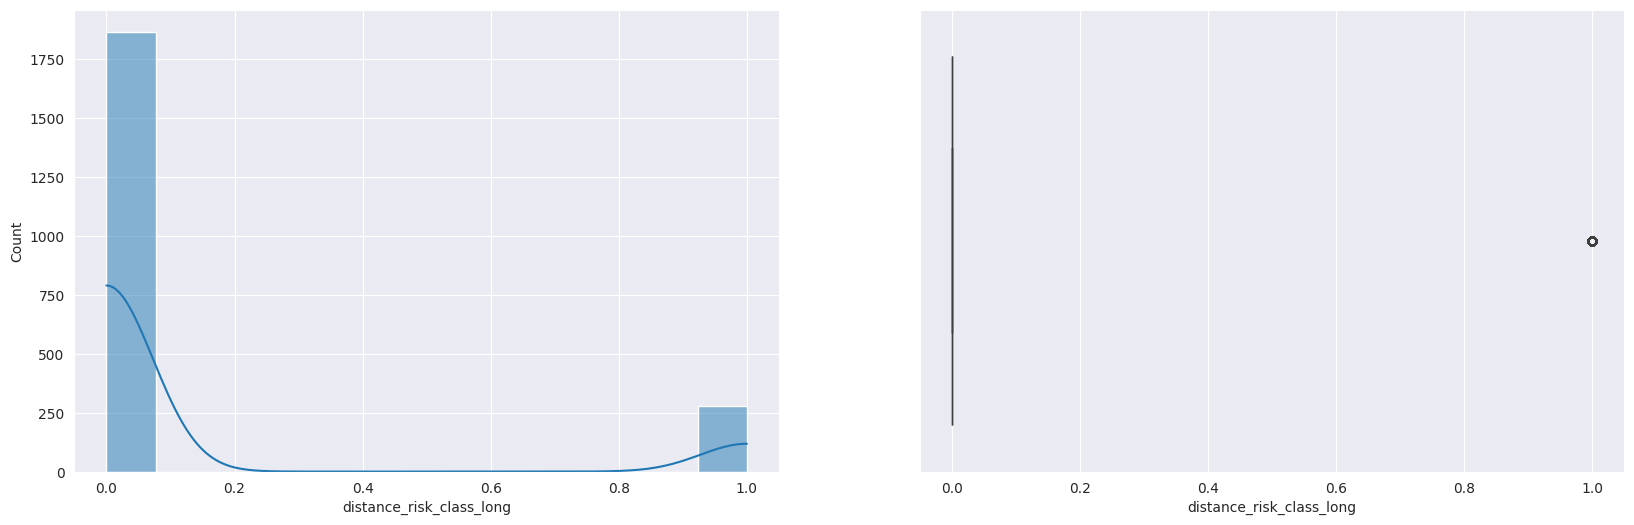

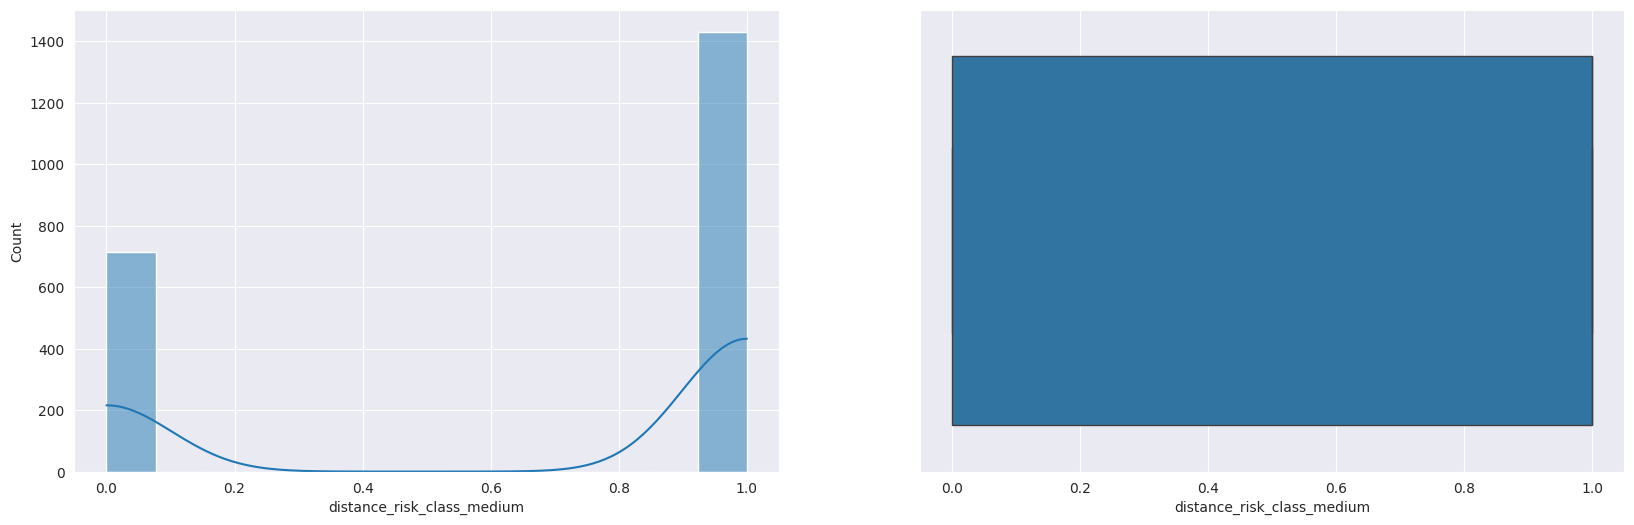

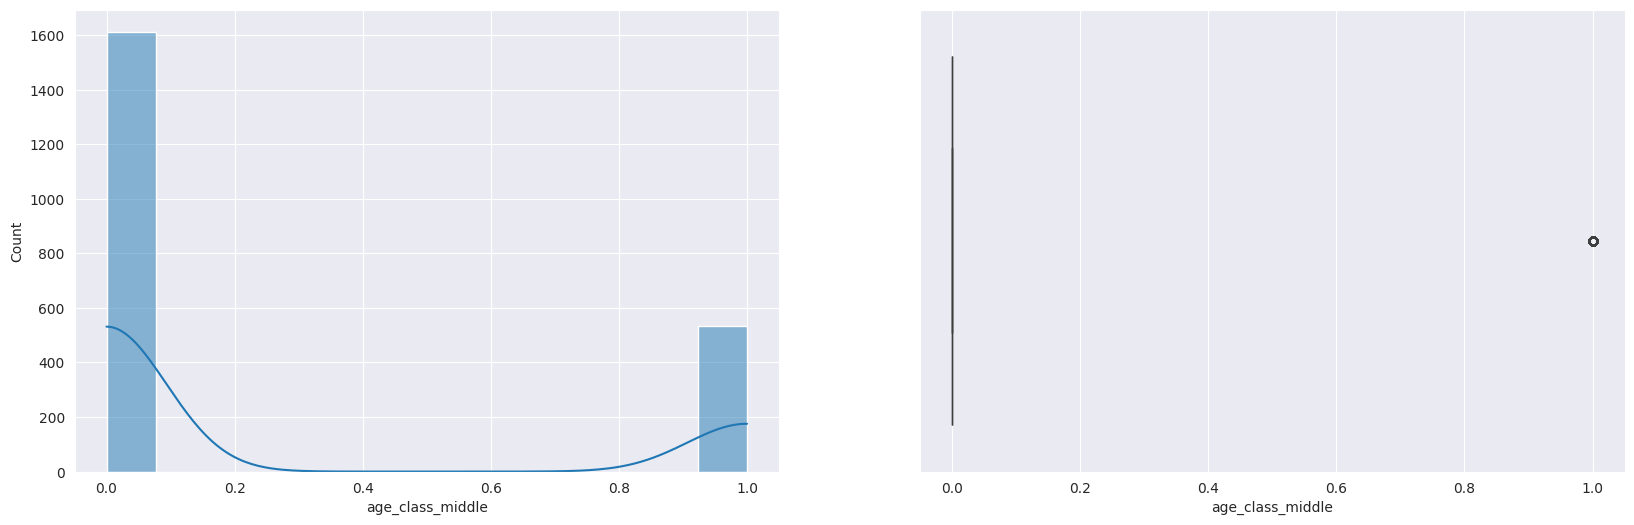

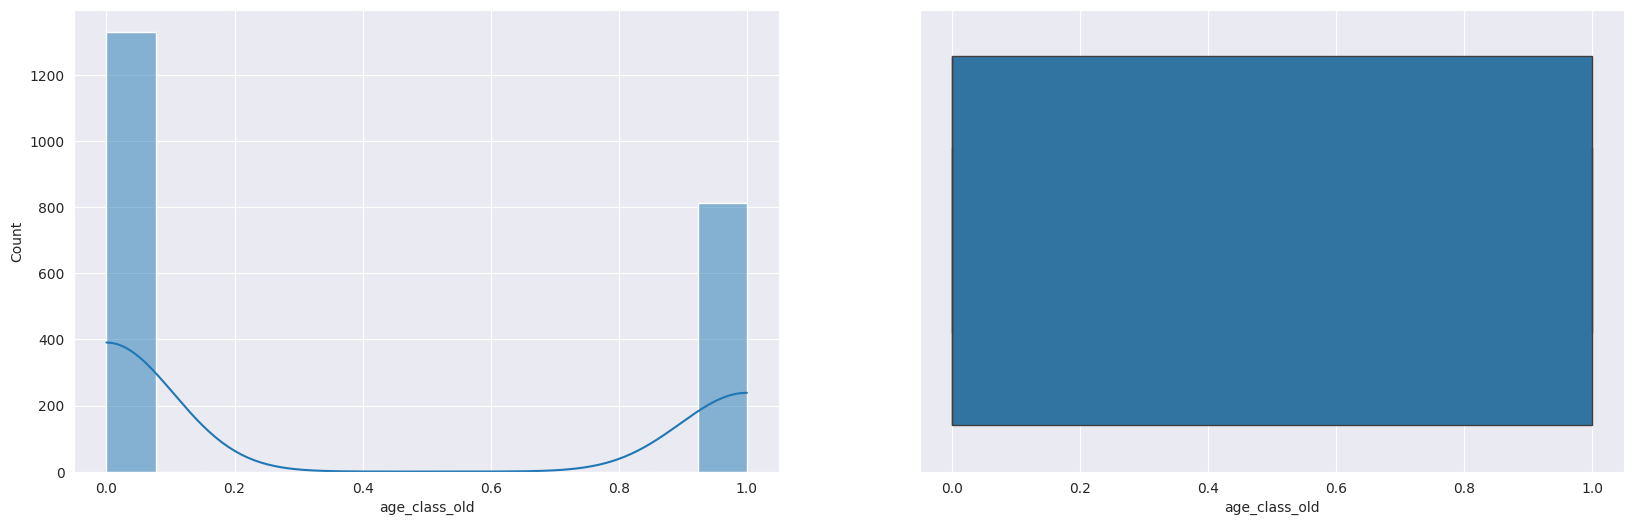

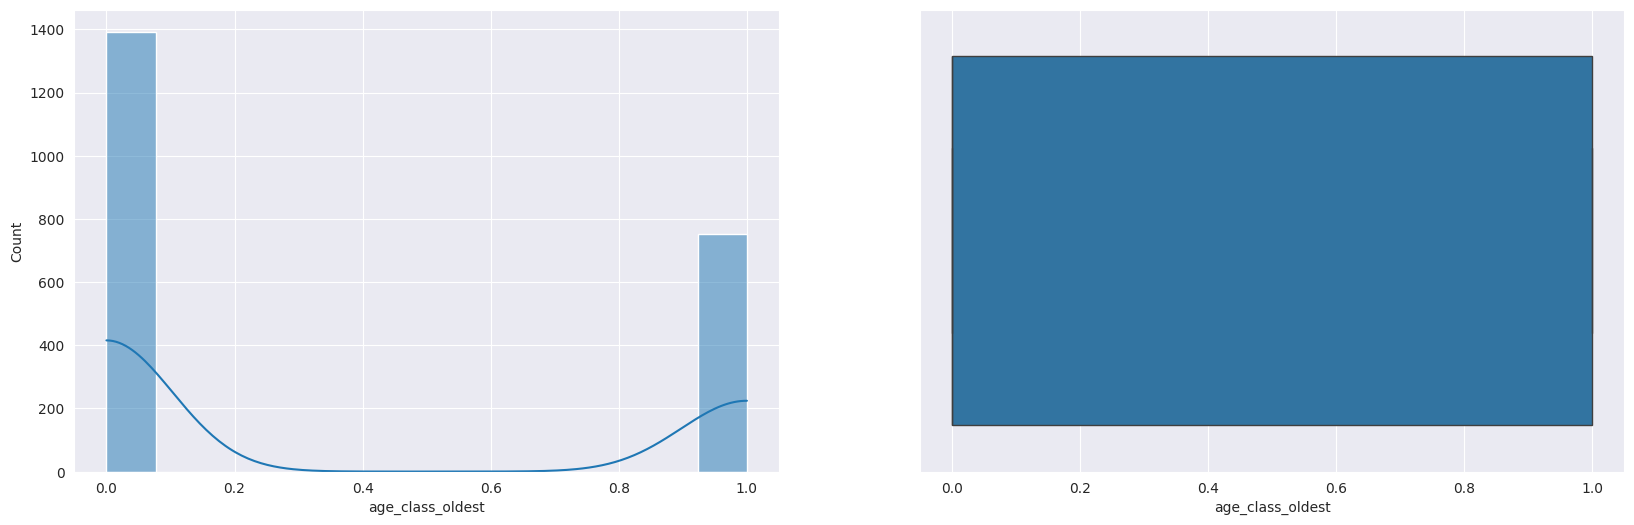

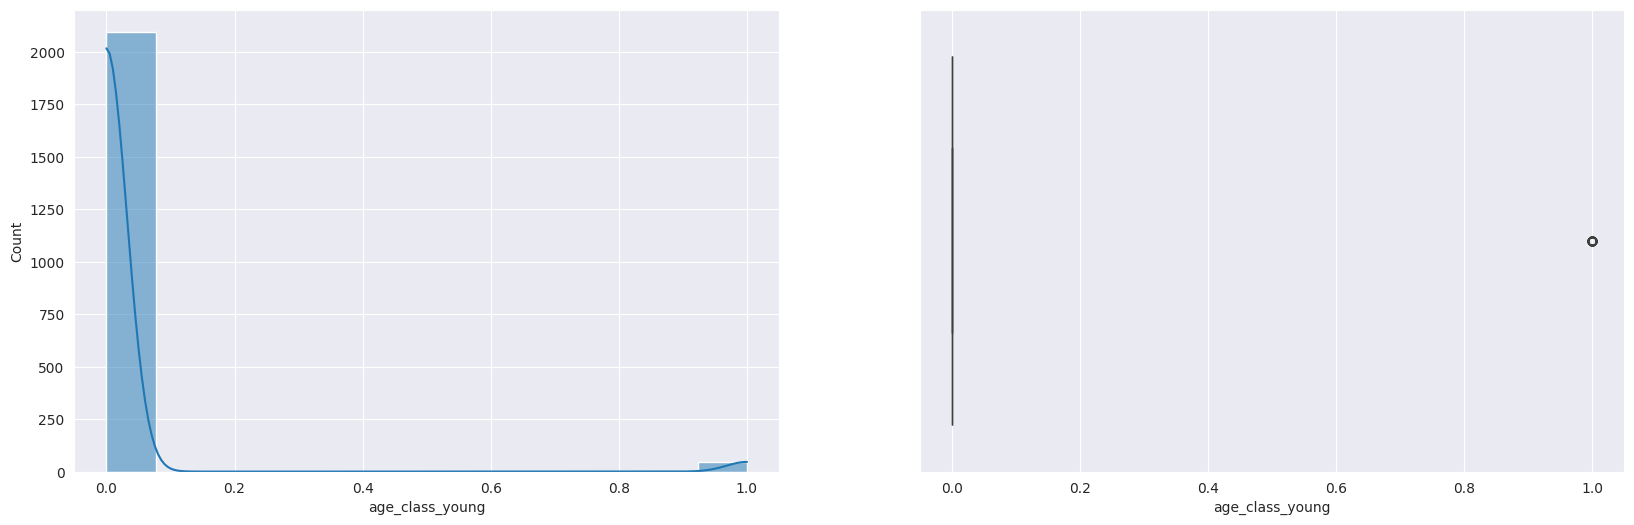

In [ ]:
fraud_data = parsed_test_data[parsed_test_data['is_fraud'] == 1]

for col in fraud_data.columns:
  if fraud_data[col].dtype != 'object':
    with sns.axes_style('darkgrid'):
      fig, ax = plt.subplots(1, 2, figsize=(20, 6))
      sns.histplot(data=fraud_data, x=col, kde=True, ax=ax[0])
      sns.boxplot(data=fraud_data, x=col, ax=ax[1])
    plt.show()

In [ ]:
features = parsed_test_data.drop(columns=['is_fraud'])
target = parsed_test_data['is_fraud']

In [ ]:
features_scaled = minmax_scaling(features, columns=features.columns)

rob_scaler = RobustScaler()
features_scaled = rob_scaler.fit_transform(features_scaled)

sta_scaler = StandardScaler()
features_scaled = sta_scaler.fit_transform(features_scaled)

=======-------      mlp Default      ------========

17367/17367 [==============================] - 28s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.72      0.76      0.74      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.88      0.87    555719
weighted avg       1.00      1.00      1.00    555719



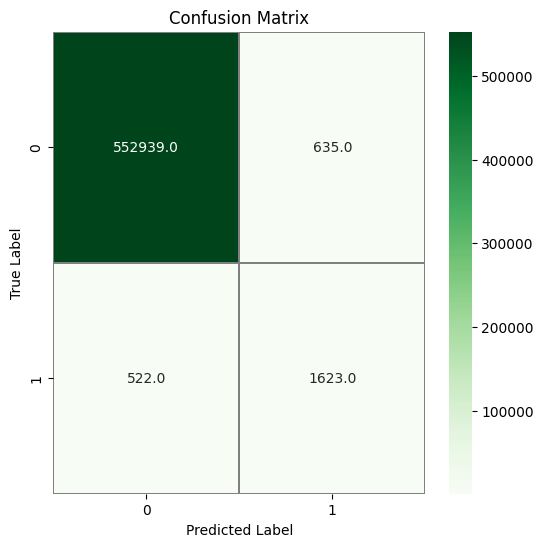

=======-------#################------========



=======-------      xgb Default      ------========

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.12      0.64      0.20      2145

    accuracy                           0.98    555719
   macro avg       0.56      0.81      0.59    555719
weighted avg       1.00      0.98      0.99    555719



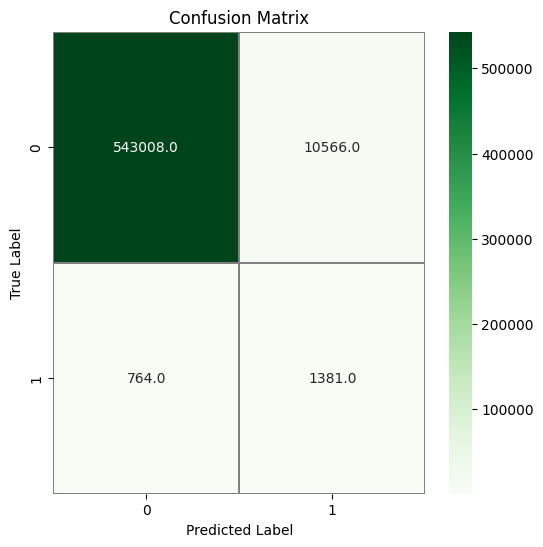

=======-------#################------========



=======-------      log Default      ------========

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.28      0.44      0.35      2145

    accuracy                           0.99    555719
   macro avg       0.64      0.72      0.67    555719
weighted avg       1.00      0.99      0.99    555719



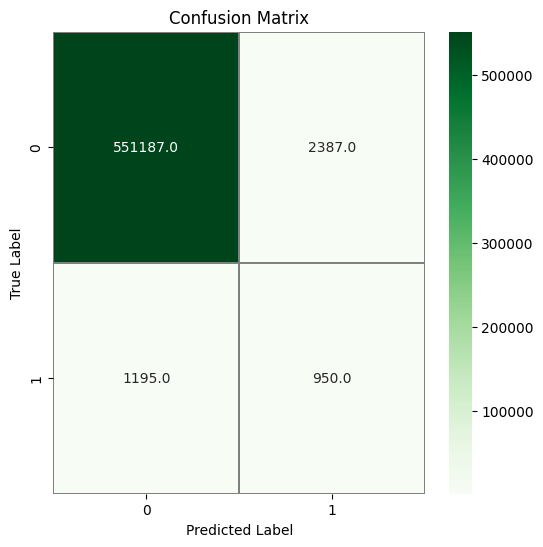

=======-------#################------========



=======-------      rf Default      ------========

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.97      0.71      0.82      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.86      0.91    555719
weighted avg       1.00      1.00      1.00    555719



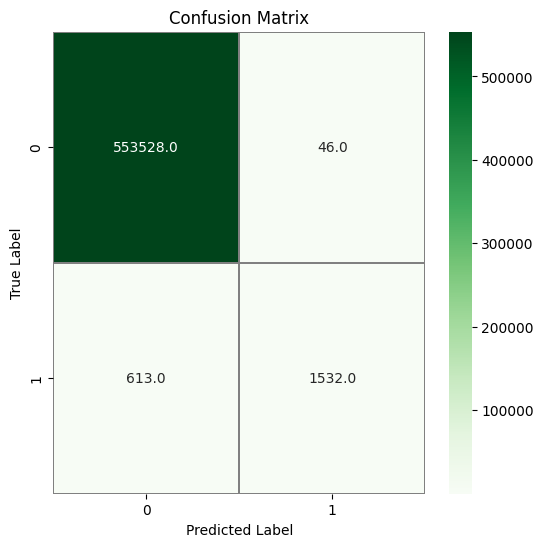

=======-------#################------========





In [ ]:
for key in default_data_results.keys():

  print(f"=======-------      {key} Default      ------========\n")
  model = default_data_results[key]['model']
  test_pred = model.predict(features_scaled)
  if key == 'mlp':
    test_pred = (test_pred >= 0.5).astype(int)

  print(classification_report(target, test_pred))

  confusion_mtx = confusion_matrix(target, test_pred)
  f,ax = plt.subplots(figsize=(6, 6))
  sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()
  print(f"=======-------#################------========\n\n\n")

=======-------      mlp ROS      ------========

17367/17367 [==============================] - 28s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.22      0.92      0.36      2145

    accuracy                           0.99    555719
   macro avg       0.61      0.96      0.68    555719
weighted avg       1.00      0.99      0.99    555719



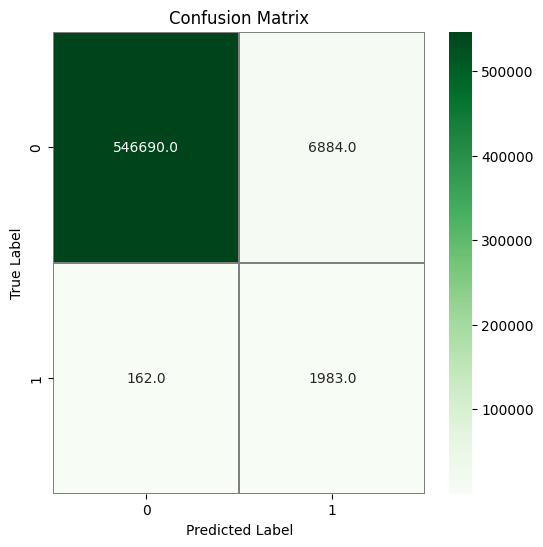

=======-------#################------========



=======-------      xgb ROS      ------========

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.10      0.66      0.17      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.82      0.58    555719
weighted avg       1.00      0.97      0.98    555719



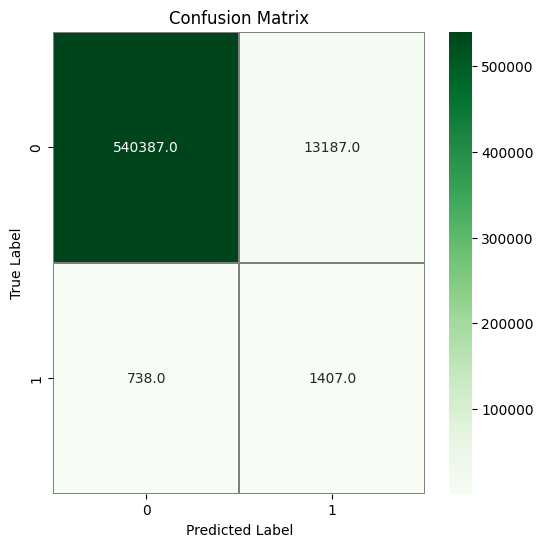

=======-------#################------========



=======-------      log ROS      ------========

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.03      0.97      0.06      2145

    accuracy                           0.89    555719
   macro avg       0.52      0.93      0.50    555719
weighted avg       1.00      0.89      0.94    555719



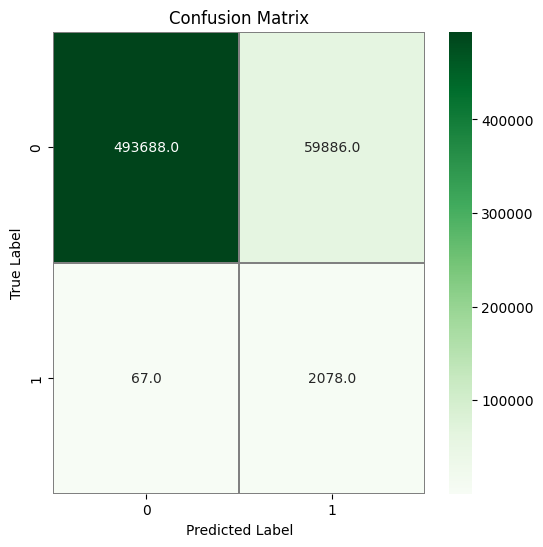

=======-------#################------========



=======-------      rf ROS      ------========

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.96      0.71      0.82      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.85      0.91    555719
weighted avg       1.00      1.00      1.00    555719



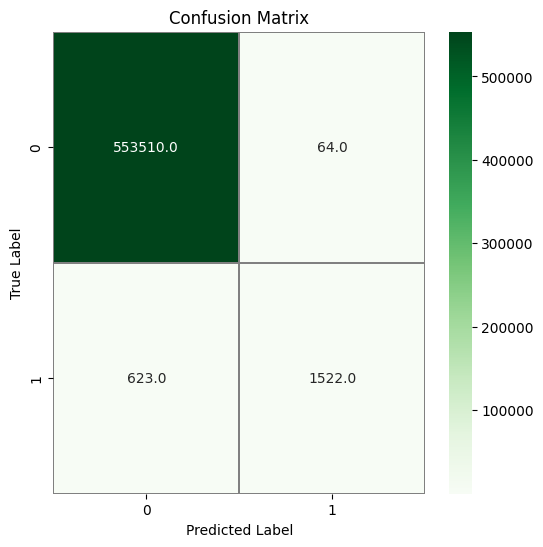

=======-------#################------========





In [ ]:
for key in ROS_data_results.keys():

  print(f"=======-------      {key} ROS      ------========\n")
  model = ROS_data_results[key]['model']
  test_pred = model.predict(features_scaled)
  if key == 'mlp':
    test_pred = (test_pred >= 0.5).astype(int)

  print(classification_report(target, test_pred))

  confusion_mtx = confusion_matrix(target, test_pred)
  f,ax = plt.subplots(figsize=(6, 6))
  sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()
  print(f"=======-------#################------========\n\n\n")

=======-------      mlp RUS      ------========

17367/17367 [==============================] - 27s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.05      0.94      0.09      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.94      0.53    555719
weighted avg       1.00      0.93      0.96    555719



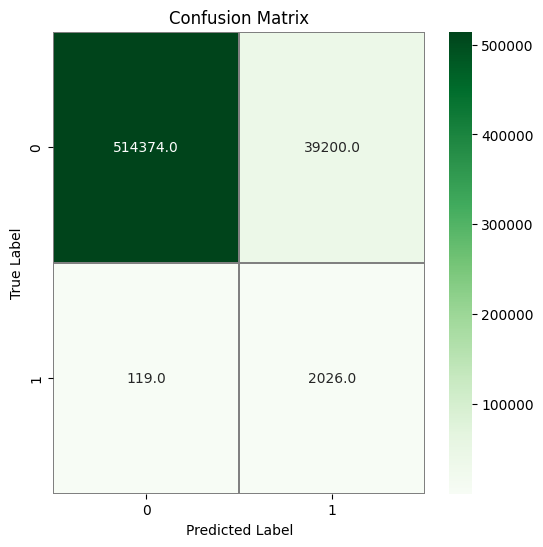

=======-------#################------========



=======-------      xgb RUS      ------========

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.08      0.98      0.14      2145

    accuracy                           0.95    555719
   macro avg       0.54      0.97      0.56    555719
weighted avg       1.00      0.95      0.97    555719



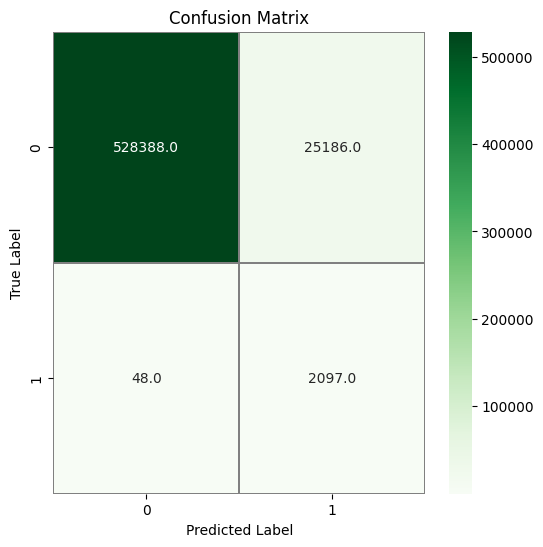

=======-------#################------========



=======-------      log RUS      ------========

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.03      0.96      0.07      2145

    accuracy                           0.90    555719
   macro avg       0.52      0.93      0.51    555719
weighted avg       1.00      0.90      0.94    555719



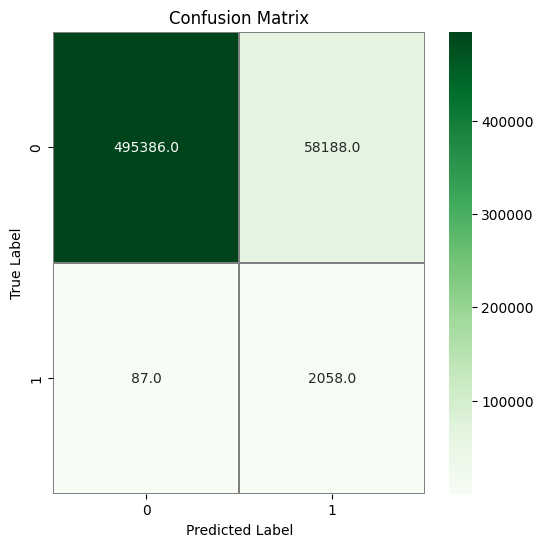

=======-------#################------========



=======-------      rf RUS      ------========

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.12      0.96      0.22      2145

    accuracy                           0.97    555719
   macro avg       0.56      0.97      0.60    555719
weighted avg       1.00      0.97      0.98    555719



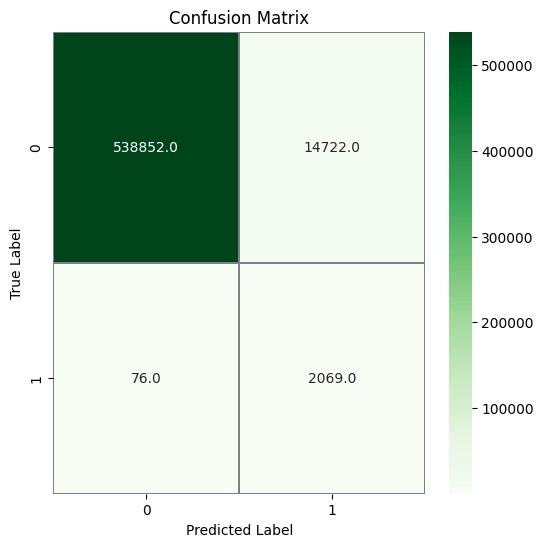

=======-------#################------========





In [ ]:
for key in RUS_data_results.keys():

  print(f"=======-------      {key} RUS      ------========\n")
  model = RUS_data_results[key]['model']
  test_pred = model.predict(features_scaled)
  if key == 'mlp':
    test_pred = (test_pred >= 0.5).astype(int)

  print(classification_report(target, test_pred))

  confusion_mtx = confusion_matrix(target, test_pred)
  f,ax = plt.subplots(figsize=(6, 6))
  sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()
  print(f"=======-------#################------========\n\n\n")

=======-------      mlp SMOTE      ------========

17367/17367 [==============================] - 28s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.13      0.93      0.23      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.95      0.61    555719
weighted avg       1.00      0.98      0.98    555719



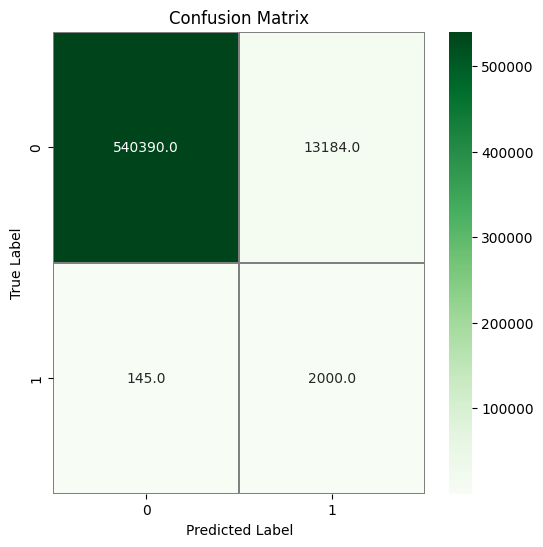

=======-------#################------========



=======-------      xgb SMOTE      ------========

              precision    recall  f1-score   support

           0       1.00      0.56      0.72    553574
           1       0.01      1.00      0.02      2145

    accuracy                           0.56    555719
   macro avg       0.50      0.78      0.37    555719
weighted avg       1.00      0.56      0.71    555719



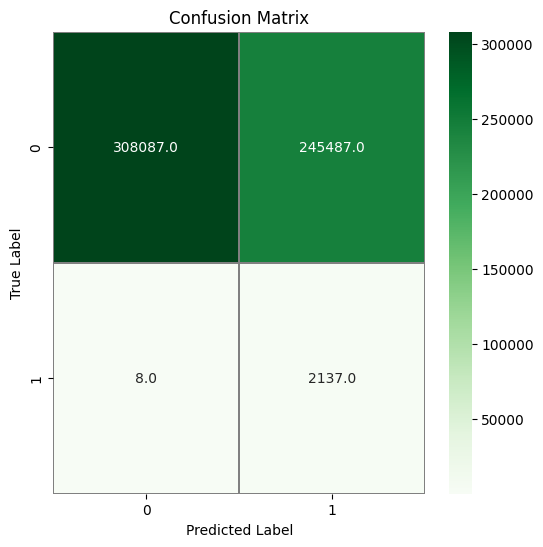

=======-------#################------========



=======-------      log SMOTE      ------========

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.03      0.97      0.06      2145

    accuracy                           0.89    555719
   macro avg       0.52      0.93      0.50    555719
weighted avg       1.00      0.89      0.94    555719



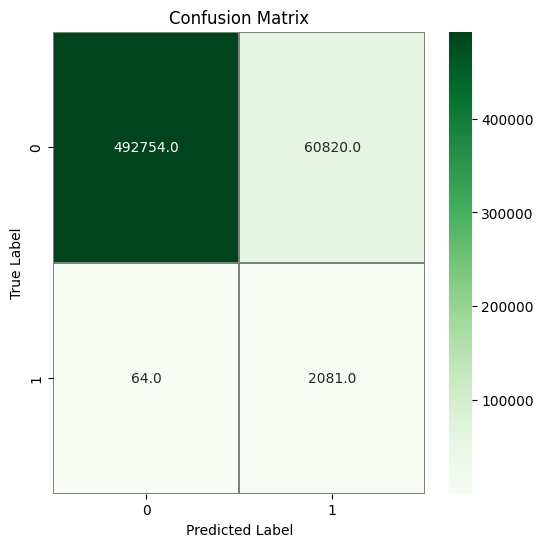

=======-------#################------========



=======-------      rf SMOTE      ------========

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.05      0.95      0.09      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.94      0.53    555719
weighted avg       1.00      0.93      0.96    555719



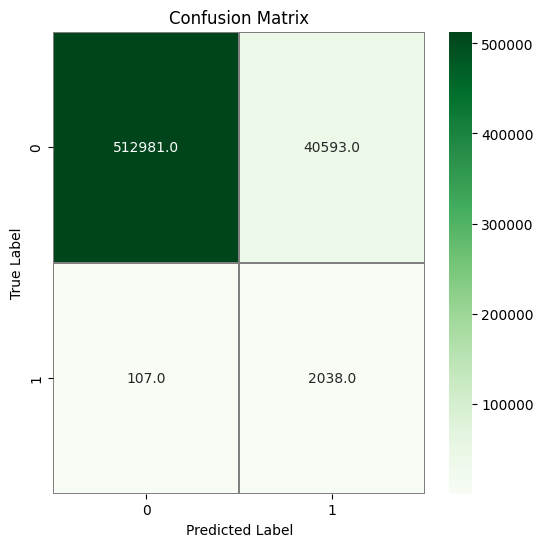

=======-------#################------========





In [ ]:
for key in SMOTE_data_results.keys():

  print(f"=======-------      {key} SMOTE      ------========\n")
  model = SMOTE_data_results[key]['model']
  test_pred = model.predict(features_scaled)
  if key == 'mlp':
    test_pred = (test_pred >= 0.5).astype(int)

  print(classification_report(target, test_pred))

  confusion_mtx = confusion_matrix(target, test_pred)
  f,ax = plt.subplots(figsize=(6, 6))
  sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()
  print(f"=======-------#################------========\n\n\n")